In [1]:
api_key = '#################################################################'
secret = '#################################################################'

In [1]:
from BTC import get_new_data, get_hist_data,indi_calc,strategy_calc

In [2]:
import pandas as pd
import random
from datetime import datetime
from prophet import Prophet
from binance.futures import Futures as Client
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from fitter import Fitter, get_common_distributions, get_distributions

In [3]:
import itertools
import numpy as np
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [39]:
import torchmetrics
from torchmetrics import MetricCollection, Accuracy, Specificity, Precision, Recall, AUROC, F1Score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, RocCurveDisplay
from sklearn.model_selection import train_test_split
from torchvision import models, transforms
from torchsummary import summary

In [6]:
import ta
import arff

In [327]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F

from sklearn.preprocessing import StandardScaler    
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

from torchvision import datasets, models, transforms
from torchinfo import summary
from torch.utils.tensorboard import SummaryWriter

import optuna

In [7]:
futures_client = Client()

# I need horizontal logariphmic scaling of past data for NN

# data preparatiom
This data set contain price, voluem, RSI and ADX\
Next iteration open interest will be added

## price data import

In [14]:
collumns2 = [
'Open time',
'Open',
'High',
'Low',
'Close',
'Volume',
'Close time',
'Quote asset volume',
'Number of trades',
'Taker buy base asset volume',
'Taker buy quote asset volume',
'Ignore'
]

In [76]:
def to_df(data_as_array):
    df=pd.DataFrame(data_as_array, columns = collumns2)
    df['Open time'] = df.apply(lambda x: datetime.fromtimestamp(int(x['Open time'])/1000) , axis=1)
    df['Close time'] = df.apply(lambda x: datetime.fromtimestamp(int(x['Close time'])/1000) , axis=1)
    df.drop(columns = ['Close time', 'Quote asset volume', 'Number of trades', 'Taker buy base asset volume', 'Taker buy quote asset volume', 'Ignore'], inplace = True)
    df[['Open', 'High', 'Low', 'Close', 'Volume']] = df[['Open', 'High', 'Low', 'Close', 'Volume']].astype('float32', copy=False)
    return df

In [54]:
data_1h = futures_client.klines("BTCUSDT", "1h", **{"limit": 1500})

In [55]:
df = to_df(data_1h)

In [48]:
df.head(5)

,Open time,Open,High,Low,Close,Volume
0,2022-05-13 00:00:00,30564.400391,30608.300781,30243.699219,30453.800781,15214.172
1,2022-05-13 01:00:00,30453.800781,31072.599609,30411.199219,30519.900391,29269.409
2,2022-05-13 02:00:00,30520.000000,30670.800781,30306.400391,30377.699219,15860.543
3,2022-05-13 03:00:00,30377.800781,30492.800781,30153.000000,30172.300781,16141.953
4,2022-05-13 04:00:00,30172.400391,30443.699219,30168.199219,30324.500000,15571.705


In [77]:
datetime_1 = int(datetime.timestamp(datetime.fromisoformat('2021-01-01 00:00:00'))*1000)
datetime_2 = int(datetime.timestamp(datetime.fromisoformat('2022-07-15 00:00:00'))*1000)

In [78]:
def make_df_BTC_1h(start_date, end_date, safe_df: bool = False, limit: int = 1000):
    """
    start_date, end_date - timestamp
    """
    df = pd.DataFrame(columns = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume'])
    num_of_tab_1 = int((end_date - start_date)/60/60/1000//limit)
    for i in range(num_of_tab_1+1):
        cur_startTime = int(i*1000*60*60*limit + start_date)
        data = futures_client.klines("BTCUSDT", "1h", **{"limit": limit, 'startTime': cur_startTime})
        df = pd.concat([df, to_df(data)], ignore_index = True)
        
    if safe_df == True:
        start_for_safe = str(datetime.fromtimestamp(start_date).year) + "_" + str(datetime.fromtimestamp(start_date).month)+ "_" + str(datetime.fromtimestamp(start_date).day)
        stop_for_safe = str(datetime.fromtimestamp(end_date).year) + "_" + str(datetime.fromtimestamp(end_date).month)+ "_" + str(datetime.fromtimestamp(end_date).day)
        df.to_csv('df_BTC_1h{}-{}.csv'.format(start_for_safe, stop_for_safe), index = False)
    return df

In [129]:
df = make_df_BTC_1h(datetime_1, datetime_2, False, limit = 1000)

## indicators calculation

In [11]:
df_RSI_ADX = indi_calc(df).RSI_ADX(14,14)
df_RSI_ADX_4 = indi_calc(df).RSI_ADX(14*4,14*4)
df_RSI_ADX_12 = indi_calc(df).RSI_ADX(14*12,14*12)
df_RSI_ADX_24 = indi_calc(df).RSI_ADX(14*24,14*24)

C:\Users\bakhi\anaconda3\lib\site-packages\ta\trend.py:769: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
C:\Users\bakhi\anaconda3\lib\site-packages\ta\trend.py:774: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
C:\Users\bakhi\anaconda3\lib\site-packages\ta\trend.py:769: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
C:\Users\bakhi\anaconda3\lib\site-packages\ta\trend.py:774: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
C:\Users\bakhi\anaconda3\lib\site-packages\ta\trend.py:769: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
C:\Users\bakhi\anaconda3\lib\site-packages\ta\trend.py:774: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
C:\Users\bakhi\a

## volume change calculation

In [147]:
# multiplicator = 0.2
percent_vol = []
cum_volume_step = 4
i = 0
for v in df.Volume:
    if cum_volume_step > i:
        percent_vol.append(np.nan)
    else:
        percent_vol.append(0.2*100*v/df.Volume[i-cum_volume_step:i].sum())
    i+=1
df['Vol_4'] = percent_vol

In [143]:
# multiplicator = 0.5
percent_vol = []
cum_volume_step = 12
i = 0
for v in df.Volume:
    if cum_volume_step > i:
        percent_vol.append(np.nan)
    else:
        percent_vol.append(0.5*100*v/df.Volume[i-cum_volume_step:i].sum())
    i+=1
df['Vol_12'] = percent_vol

In [133]:
percent_vol = []
cum_volume_step = 24
i = 0
for v in df.Volume:
    if cum_volume_step > i:
        percent_vol.append(np.nan)
    else:
        percent_vol.append(100*v/df.Volume[i-cum_volume_step:i].sum())
    i+=1
df['Vol_24'] = percent_vol

In [139]:
# multiplicator = 10
percent_vol = []
cum_volume_step = 24*7
i = 0
for v in df.Volume:
    if cum_volume_step > i:
        percent_vol.append(np.nan)
    else:
        percent_vol.append(10*100*v/df.Volume[i-cum_volume_step:i].sum())
    i+=1
df['Vol_week'] = percent_vol

In [141]:
# multiplicator = 40
percent_vol = []
cum_volume_step = 24*30
i = 0
for v in df.Volume:
    if cum_volume_step > i:
        percent_vol.append(np.nan)
    else:
        percent_vol.append(40*100*v/df.Volume[i-cum_volume_step:i].sum())
    i+=1
df['Vol_month'] = percent_vol

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13463 entries, 0 to 13462
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Open time  13463 non-null  datetime64[ns]
 1   Open       13463 non-null  float32       
 2   High       13463 non-null  float32       
 3   Low        13463 non-null  float32       
 4   Close      13463 non-null  float32       
 5   Volume     13463 non-null  float32       
 6   Vol_4      13459 non-null  float64       
 7   Vol_12     13451 non-null  float64       
 8   Vol_24     13439 non-null  float64       
 9   Vol_week   13295 non-null  float64       
 10  Vol_month  12743 non-null  float64       
dtypes: datetime64[ns](1), float32(5), float64(5)
memory usage: 894.2 KB


In [148]:
df.describe()

,Open,High,Low,Close,Volume,Vol_4,Vol_12,Vol_24,Vol_week,Vol_month
count,13463.000000,13463.000000,13463.000000,13463.000000,13463.000000,13459.000000,13451.000000,13439.000000,13295.000000,12743.000000
mean,43275.371094,43537.007812,43001.296875,43274.757812,17135.841797,5.476938,4.465122,4.312756,6.050006,5.726578
std,10896.250000,10930.499023,10858.110352,10897.347656,15111.171875,3.727005,3.308279,3.171097,4.766301,4.781571
min,17798.000000,18147.000000,17593.199219,17798.000000,63.931999,0.027232,0.018010,0.020249,0.022660,0.027431
25%,35931.250000,36200.000000,35663.800781,35931.250000,7809.509521,3.286788,2.487734,2.429907,3.246692,2.917834
50%,42636.199219,42800.000000,42436.179688,42635.910156,12522.884766,4.481341,3.522548,3.373731,4.651679,4.308334
75%,50271.728516,50559.083984,50027.025391,50271.724609,20893.471680,6.327261,5.249534,5.029962,7.115738,6.823287
max,68714.851562,69198.703125,68525.960938,68714.851562,233367.046875,45.410765,44.452484,45.303561,86.930494,88.470502


## price min-max calculation

In [151]:
maximum = []
minimum = []
cum_volume_step = 4
i = 0
for v in df.Open:
    if cum_volume_step > i:
        maximum.append(np.nan)
        minimum.append(np.nan)
    else:
        maximum.append(df.Open[i-cum_volume_step:i].max()/v)
        minimum.append(df.Open[i-cum_volume_step:i].min()/v)
    i+=1
df['Max_4'] = maximum
df['Min_4'] = minimum

In [153]:
maximum = []
minimum = []
cum_volume_step = 12
i = 0
for v in df.Open:
    if cum_volume_step > i:
        maximum.append(np.nan)
        minimum.append(np.nan)
    else:
        maximum.append(df.Open[i-cum_volume_step:i].max()/v)
        minimum.append(df.Open[i-cum_volume_step:i].min()/v)
    i+=1
df['Max_12'] = maximum
df['Min_12'] = minimum

In [154]:
maximum = []
minimum = []
cum_volume_step = 24
i = 0
for v in df.Open:
    if cum_volume_step > i:
        maximum.append(np.nan)
        minimum.append(np.nan)
    else:
        maximum.append(df.Open[i-cum_volume_step:i].max()/v)
        minimum.append(df.Open[i-cum_volume_step:i].min()/v)
    i+=1
df['Max_24'] = maximum
df['Min_24'] = minimum

In [155]:
maximum = []
minimum = []
cum_volume_step = 24*7
i = 0
for v in df.Open:
    if cum_volume_step > i:
        maximum.append(np.nan)
        minimum.append(np.nan)
    else:
        maximum.append(df.Open[i-cum_volume_step:i].max()/v)
        minimum.append(df.Open[i-cum_volume_step:i].min()/v)
    i+=1
df['Max_week'] = maximum
df['Min_week'] = minimum

In [156]:
maximum = []
minimum = []
cum_volume_step = 24*30
i = 0
for v in df.Open:
    if cum_volume_step > i:
        maximum.append(np.nan)
        minimum.append(np.nan)
    else:
        maximum.append(df.Open[i-cum_volume_step:i].max()/v)
        minimum.append(df.Open[i-cum_volume_step:i].min()/v)
    i+=1
df['Max_month'] = maximum
df['Min_month'] = minimum

In [164]:
df.describe()

,Open,High,Low,Close,Volume,Vol_4,Vol_12,Vol_24,Vol_week,Vol_month,...,Max_24,Min_24,Max_week,Min_week,Max_month,Min_month,price_change_4,price_change_12,price_change_24,price_change_week
count,13463.000000,13463.000000,13463.000000,13463.000000,13463.000000,13459.000000,13451.000000,13439.000000,13295.000000,12743.000000,...,13439.000000,13439.000000,13295.000000,13295.000000,12743.000000,12743.000000,13459.000000,13451.000000,13439.000000,13295.000000
mean,43275.371094,43537.007812,43001.296875,43274.757812,17135.841797,5.476938,4.465122,4.312756,6.050006,5.726578,...,1.024712,0.975200,1.080273,0.926752,1.198271,0.851936,-0.000090,0.007888,0.021291,-0.037519
std,10896.250000,10930.499023,10858.110352,10897.347656,15111.171875,3.727005,3.308279,3.171097,4.766301,4.781571,...,0.029615,0.026563,0.080877,0.057037,0.167801,0.104933,1.807139,2.976239,4.197449,10.648052
min,17798.000000,18147.000000,17593.199219,17798.000000,63.931999,0.027232,0.018010,0.020249,0.022660,0.027431,...,0.907816,0.809537,0.939802,0.698953,0.948175,0.507341,-16.044316,-20.265721,-22.714747,-39.683585
25%,35931.250000,36200.000000,35663.800781,35931.250000,7809.509521,3.286788,2.487734,2.429907,3.246692,2.917834,...,1.005746,0.963577,1.022904,0.891280,1.067887,0.787867,-0.812797,-1.443546,-2.190624,-6.392168
50%,42636.199219,42800.000000,42436.179688,42635.910156,12522.884766,4.481341,3.522548,3.373731,4.651679,4.308334,...,1.016050,0.981967,1.058594,0.939518,1.166752,0.872011,0.011545,0.015905,0.020253,-0.334872
75%,50271.728516,50559.083984,50027.025391,50271.724609,20893.471680,6.327261,5.249534,5.029962,7.115738,6.823287,...,1.034459,0.993082,1.110953,0.972251,1.256048,0.934657,0.803176,1.498847,2.269597,5.761276
max,68714.851562,69198.703125,68525.960938,68714.851562,233367.046875,45.410765,44.452484,45.303561,86.930494,88.470502,...,1.256322,1.104103,1.619720,1.104103,1.875491,1.104103,16.164395,18.512008,22.726460,41.222520


## future price changing calculation

In [159]:
future_price = []
step = 4
lengh = len(df.Open)
i = 0
for v in df.Open:
    if lengh <= i+step:
        future_price.append(np.nan)
    else:
        aver_future_price = (df.Open[i+step]+df.Close[i+step]+df.High[i+step]+df.Low[i+step])/4
        future_price.append(100*(aver_future_price - v)/v)
    i+=1
df['price_change_4'] = future_price

In [161]:
future_price = []
step = 12
lengh = len(df.Open)
i = 0
for v in df.Open:
    if lengh <= i+step:
        future_price.append(np.nan)
    else:
        aver_future_price = (df.Open[i+step]+df.Close[i+step]+df.High[i+step]+df.Low[i+step])/4
        future_price.append(100*(aver_future_price - v)/v)
    i+=1
df['price_change_12'] = future_price

In [162]:
future_price = []
step = 24
lengh = len(df.Open)
i = 0
for v in df.Open:
    if lengh <= i+step:
        future_price.append(np.nan)
    else:
        aver_future_price = (df.Open[i+step]+df.Close[i+step]+df.High[i+step]+df.Low[i+step])/4
        future_price.append(100*(aver_future_price - v)/v)
    i+=1
df['price_change_24'] = future_price

In [163]:
future_price = []
step = 24*7
lengh = len(df.Open)
i = 0
for v in df.Open:
    if lengh <= i+step:
        future_price.append(np.nan)
    else:
        aver_future_price = (df.Open[i+step]+df.Close[i+step]+df.High[i+step]+df.Low[i+step])/4
        future_price.append(100*(aver_future_price - v)/v)
    i+=1
df['price_change_week'] = future_price

In [166]:
df.to_csv('df_BTC_1h_weka{}-{}.csv'.format('01012021', '17152022'), index = False)

In [8]:
df = pd.read_csv('df_BTC_1h_weka01012021-17152022.csv')

In [10]:
df.head(5)

,Open time,Open,High,Low,Close,Volume,Vol_4,Vol_12,Vol_24,Vol_week,...,Max_24,Min_24,Max_week,Min_week,Max_month,Min_month,price_change_4,price_change_12,price_change_24,price_change_week
0,2021-01-01 00:00:00,29237.06,29249.31,29110.89,29213.80,4199.729,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.307508,-0.195940,0.889403,31.182524
1,2021-01-01 01:00:00,29213.80,29283.00,29112.10,29197.30,3977.249,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.188976,-0.635375,1.531957,30.912362
2,2021-01-01 02:00:00,29198.01,29214.96,28822.00,29107.71,10153.425,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.438687,-0.462166,1.921692,32.807265
3,2021-01-01 03:00:00,29107.72,29190.00,28900.00,29025.89,9141.397,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.855363,0.014742,2.394097,33.275516
4,2021-01-01 04:00:00,29025.90,29333.12,29000.00,29229.60,7225.092,5.260006,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.202395,0.657427,2.548175,34.171616


## price change treshholder for:
4h - 3%\
12h - 5%\
24h - 8%\
week - 15%

<AxesSubplot:>

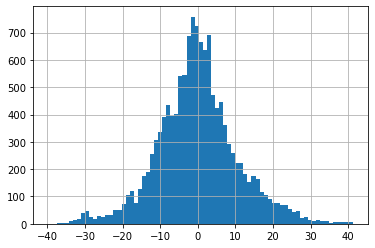

In [181]:
df.price_change_week.hist(bins=75)

# Dataset for WEKA preparations

## joying indicators

In [24]:
indicators_1h = df_RSI_ADX[['Open time', 'ADX', '-DI', '+DI', 'RSI']]
indicators_1h.columns = ['Open time', 'ADX', '-DI', '+DI', 'RSI']

indicators_4h = df_RSI_ADX_4[['Open time', 'ADX', '-DI', '+DI', 'RSI']]
indicators_4h.columns = ['Open time', 'ADX_4h', '-DI_4h', '+DI_4h', 'RSI_4h']

indicators_12h = df_RSI_ADX_12[['Open time', 'ADX', '-DI', '+DI', 'RSI']]
indicators_12h.columns = ['Open time', 'ADX_12h', '-DI_12h', '+DI_12h', 'RSI_12h']

indicators_24h = df_RSI_ADX_24[['Open time', 'ADX', '-DI', '+DI', 'RSI']]
indicators_24h.columns = ['Open time', 'ADX_24h', '-DI_24h', '+DI_24h', 'RSI_24h']

In [33]:
df1 = pd.merge(df, indicators_1h, on = 'Open time')
df2 = pd.merge(df1, indicators_4h, on = 'Open time')
df3 = pd.merge(df2, indicators_12h, on = 'Open time')
df4 = pd.merge(df3, indicators_24h, on = 'Open time')

## present price changing

In [81]:
present_price = []
cum_volume_step = 1
i = 0
for v in df4.Open:
    if cum_volume_step > i:
        present_price.append(np.nan)
    else:
        present_price.append((v - df4.Open[i-cum_volume_step])/v)
    i+=1
df4['pre_pri_ch_1'] = present_price

In [82]:
present_price = []
cum_volume_step = 2
i = 0
for v in df4.Open:
    if cum_volume_step > i:
        present_price.append(np.nan)
    else:
        present_price.append((v - df4.Open[i-cum_volume_step])/v)
    i+=1
df4['pre_pri_ch_2'] = present_price

In [83]:
present_price = []
cum_volume_step = 3
i = 0
for v in df4.Open:
    if cum_volume_step > i:
        present_price.append(np.nan)
    else:
        present_price.append((v - df4.Open[i-cum_volume_step])/v)
    i+=1
df4['pre_pri_ch_3'] = present_price

In [84]:
present_price = []
cum_volume_step = 4
i = 0
for v in df4.Open:
    if cum_volume_step > i:
        present_price.append(np.nan)
    else:
        present_price.append((v - df4.Open[i-cum_volume_step])/v)
    i+=1
df4['pre_pri_ch_4'] = present_price

In [85]:
present_price = []
cum_volume_step = 12
i = 0
for v in df4.Open:
    if cum_volume_step > i:
        present_price.append(np.nan)
    else:
        present_price.append((v - df4.Open[i-cum_volume_step])/v)
    i+=1
df4['pre_pri_ch_12'] = present_price

In [86]:
present_price = []
cum_volume_step = 24
i = 0
for v in df4.Open:
    if cum_volume_step > i:
        present_price.append(np.nan)
    else:
        present_price.append((v - df4.Open[i-cum_volume_step])/v)
    i+=1
df4['pre_pri_ch_24'] = present_price

In [88]:
df5 = df4.dropna()

In [89]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12605 entries, 720 to 13324
Data columns (total 47 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Open time          12605 non-null  datetime64[ns]
 1   Open               12605 non-null  float64       
 2   High               12605 non-null  float64       
 3   Low                12605 non-null  float64       
 4   Close              12605 non-null  float64       
 5   Volume             12605 non-null  float64       
 6   Vol_4              12605 non-null  float64       
 7   Vol_12             12605 non-null  float64       
 8   Vol_24             12605 non-null  float64       
 9   Vol_week           12605 non-null  float64       
 10  Vol_month          12605 non-null  float64       
 11  Max_4              12605 non-null  float64       
 12  Min_4              12605 non-null  float64       
 13  Max_12             12605 non-null  float64       
 14  Min_

In [90]:
df5.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,12605.0,44117.170493,10735.562126,17798.000000,37218.090000,43628.390000,51164.860000,68714.850000
High,12605.0,44374.045081,10772.528780,18147.000000,37485.000000,43884.890000,51482.990000,69198.700000
Low,12605.0,43849.528400,10692.254491,17593.200000,36892.130000,43389.150000,50825.430000,68525.960000
Close,12605.0,44115.758347,10736.357923,17798.000000,37218.090000,43628.820000,51164.850000,68714.850000
Volume,12605.0,16995.368532,15122.961445,63.932000,7623.852000,12302.059000,20812.877000,233367.050000
Vol_4,12605.0,5.480514,3.753048,0.027232,3.268557,4.468490,6.337195,45.410765
Vol_12,12605.0,4.467082,3.323429,0.018010,2.470821,3.513375,5.268088,44.452484
Vol_24,12605.0,4.307694,3.173406,0.020249,2.412113,3.366155,5.028964,45.303561
Vol_week,12605.0,6.053719,4.781108,0.022660,3.222280,4.647173,7.126030,86.930494
Vol_month,12605.0,5.731868,4.791087,0.027431,2.911838,4.310092,6.833802,88.470502


In [91]:
df5.to_csv('BTC_dataset.csv', index = False)

In [8]:
df5 = pd.read_csv('BTC_dataset.csv')

## dataset 4h_3%

<AxesSubplot:>

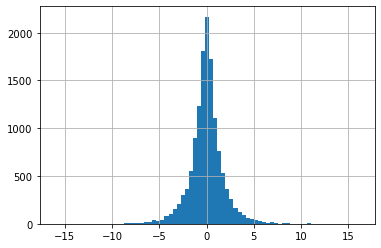

In [59]:
df['price_change_4'].hist(bins=75)

In [7]:
df5.columns

Index(['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Vol_4',
       'Vol_12', 'Vol_24', 'Vol_week', 'Vol_month', 'Max_4', 'Min_4', 'Max_12',
       'Min_12', 'Max_24', 'Min_24', 'Max_week', 'Min_week', 'Max_month',
       'Min_month', 'price_change_4', 'price_change_12', 'price_change_24',
       'price_change_week', 'ADX', '-DI', '+DI', 'RSI', 'ADX_4h', '-DI_4h',
       '+DI_4h', 'RSI_4h', 'ADX_12h', '-DI_12h', '+DI_12h', 'RSI_12h',
       'ADX_24h', '-DI_24h', '+DI_24h', 'RSI_24h', 'pre_pri_ch_1',
       'pre_pri_ch_24', 'pre_pri_ch_2', 'pre_pri_ch_3', 'pre_pri_ch_4',
       'pre_pri_ch_12'],
      dtype='object')

In [12]:
list_columns = ['pre_pri_ch_1',
       'pre_pri_ch_24', 'pre_pri_ch_2', 'pre_pri_ch_3', 'pre_pri_ch_4',
       'pre_pri_ch_12','Vol_4','Vol_12', 'Vol_24', 'Vol_week', 'Vol_month', 'Max_4', 'Min_4', 'Max_12',
               'Min_12', 'Max_24', 'Min_24', 'Max_week', 'Min_week', 'Max_month','Min_month',
                       'ADX', '-DI', '+DI', 'RSI', 'ADX_4h', '-DI_4h',
                       '+DI_4h', 'RSI_4h', 'ADX_12h', '-DI_12h', '+DI_12h', 'RSI_12h',
                       'ADX_24h', '-DI_24h', '+DI_24h', 'RSI_24h', 
                'target']

In [9]:
df5['target'] = df5['price_change_4'].apply(lambda x: 1 if x>=0.75 else 0)

In [13]:
df_1hour = df5[list_columns]

In [14]:
df_1hour.target.sum()/len(df_1hour)

0.2539468464894883

In [15]:
lenght_train = int(len(df_1hour)*0.7)
lenght_test = len(df_1hour) - lenght_train

In [16]:
df_1hour_train = df_1hour[:lenght_train]
df_1hour_test = df_1hour[-lenght_test:]

In [122]:
arff.dump('btc_1h_train.arff'
      , df_1hour_train.values
      , relation='btc_1h_train'
      , names=df_1hour_train.columns)

arff.dump('btc_1h_test.arff'
      , df_1hour_test.values
      , relation='btc_1h_test'
      , names=df_1hour_test.columns)

In [17]:
df6 = df5.drop(['Open time'], axis = 1)

In [100]:

arff.dump('df6.arff'
      , df6.values
      , relation='df5'
      , names=df6.columns)

### trying to set most important featuries

In [18]:
effective_featuries = ['Min_24', 
                       'Max_week', 
                       'Max_month', 
                       'RSI_24h', 
                       '+DI_12h','-DI_12h', 
                       '+DI_24h', 
                       'RSI_12h', 
                       'Min_month', 
                       'Min_week', 
                       'pre_pri_ch_24', 
                       'Max_12', 
                       'pre_pri_ch_1', 
                       'Min_12', 
                       'pre_pri_ch_4',
                      'target']

In [19]:
df7_1hour = df5[effective_featuries]

In [144]:
arff.dump('df7.arff'
      , df7_1hour.values
      , relation='df7'
      , names=df7_1hour.columns)

# simple NN

In [21]:
df = df7_1hour

In [22]:
df.head()

,Min_24,Max_week,Max_month,RSI_24h,+DI_12h,-DI_12h,+DI_24h,RSI_12h,Min_month,Min_week,pre_pri_ch_24,Max_12,pre_pri_ch_1,Min_12,pre_pri_ch_4,target
0,0.984514,1.124585,1.220196,50.233964,18.774448,21.411371,18.580870,50.399425,0.852196,0.868659,0.015486,1.019403,0.002763,0.992005,-0.001086,0
1,0.992463,1.133626,1.230005,50.098131,18.729047,21.451396,18.559399,50.146414,0.859047,0.875642,0.007537,1.027598,-0.008039,0.999980,-0.013000,0
2,1.000714,1.137152,1.233831,50.045779,18.662583,21.495604,18.527963,50.048923,0.861719,0.878365,-0.004580,1.030795,-0.003110,1.003090,-0.003091,0
3,1.001567,1.138934,1.235764,50.019408,18.574626,21.516800,18.486305,49.999736,0.863069,0.879742,-0.013248,1.032410,-0.001567,1.001567,-0.009961,0
4,1.000010,1.138945,1.235776,50.019248,18.499379,21.429633,18.450609,49.999436,0.863078,0.879750,-0.008574,1.032420,-0.000010,1.000010,-0.012769,0


<AxesSubplot:xlabel='target', ylabel='count'>

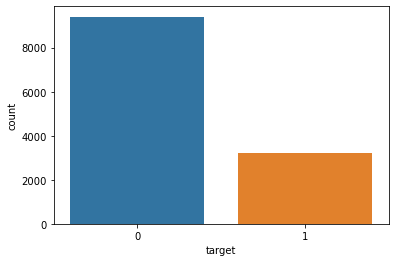

In [23]:
sns.countplot(x = 'target', data=df)

In [24]:
df['target'] = df['target'].astype('category')

<ipython-input-24-2226efc13b9c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'] = df['target'].astype('category')


In [25]:
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [190]:
lenght_train = int(len(df)*0.7)
lenght_valid = int(len(df)*0.2)
lenght_test = len(df) - lenght_train - lenght_valid

In [193]:
X_train = X[:lenght_train]
X_valid = X[lenght_train : lenght_train + lenght_valid]
X_test = X[-lenght_test:]

In [194]:
y_train = y[:lenght_train]
y_valid = y[lenght_train : lenght_train + lenght_valid]
y_test = y[-lenght_test:]

In [199]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
X_test = scaler.transform(X_test)

In [200]:
EPOCHS = 50
BATCH_SIZE = 64
LEARNING_RATE = 0.001

In [201]:
## train data
class TrainData(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)


train_data = TrainData(torch.FloatTensor(X_train), 
                       torch.FloatTensor(y_train.values))

## train data
class ValidData(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)


valid_data = ValidData(torch.FloatTensor(X_valid), 
                       torch.FloatTensor(y_valid.values))

## test data    
class TestData(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)
    

test_data = TestData(torch.FloatTensor(X_test), 
                     torch.FloatTensor(y_test.values))

In [206]:
train_loader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
valid_loader = DataLoader(dataset=valid_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=BATCH_SIZE, shuffle=True)

In [135]:
class BTC_pro(nn.Module):
    def __init__(self):
        super(BTC_pro, self).__init__()
        # Number of input features is 12.
        self.layer_1 = nn.Linear(15, 128) 
        self.layer_2 = nn.Linear(128, 128)
        self.layer_out = nn.Linear(128, 1) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.1)
        self.batchnorm1 = nn.BatchNorm1d(128)
        self.batchnorm2 = nn.BatchNorm1d(128)
        
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.batchnorm1(x)
        x = self.relu(self.layer_2(x))
        x = self.batchnorm2(x)
        x = self.dropout(x)
        x = self.layer_out(x)
        
        return x

In [207]:
class BTC_pro1(nn.Module):
    def __init__(self):
        super(BTC_pro1, self).__init__()
        # Number of input features is 12.
        self.layer_1 = nn.Linear(15, 128) 
        self.layer_2 = nn.Linear(128, 128)
        self.layer_out = nn.Linear(128, 1) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.1)
        self.batchnorm1 = nn.BatchNorm1d(128)
        self.batchnorm2 = nn.BatchNorm1d(128)
        
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.batchnorm1(x)
        x = self.relu(self.layer_2(x))
        x = self.batchnorm2(x)
        x = self.dropout(x)
        x = self.layer_out(x)
        
        return x

In [219]:
class BTC_pro2(nn.Module):
    def __init__(self):
        super(BTC_pro2, self).__init__()
        # Number of input features is 12.
        self.layer_1 = nn.Linear(15, 64) 
        self.layer_2 = nn.Linear(64, 64)
        self.layer_out = nn.Linear(64, 1) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.1)
        self.batchnorm1 = nn.BatchNorm1d(64)
        self.batchnorm2 = nn.BatchNorm1d(64)
        
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.batchnorm1(x)
        x = self.relu(self.layer_2(x))
        x = self.batchnorm2(x)
        x = self.dropout(x)
        x = self.layer_out(x)
        
        return x

In [220]:
class BTC_pro3(nn.Module):
    def __init__(self):
        super(BTC_pro3, self).__init__()
        # Number of input features is 12.
        self.layer_1 = nn.Linear(15, 64) 
        self.layer_2 = nn.Linear(64, 128)
        self.layer_3 = nn.Linear(128, 128)
        self.layer_4 = nn.Linear(128, 64)
        self.layer_out = nn.Linear(64, 1) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.1)
        self.batchnorm1 = nn.BatchNorm1d(64)
        self.batchnorm2 = nn.BatchNorm1d(128)
        self.batchnorm3 = nn.BatchNorm1d(128)
        self.batchnorm4 = nn.BatchNorm1d(64)
        
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.batchnorm1(x)
        x = self.relu(self.layer_2(x))
        x = self.batchnorm2(x)
        
        x = self.relu(self.layer_3(x))
        x = self.batchnorm3(x)
        x = self.relu(self.layer_4(x))
        x = self.batchnorm4(x)
        
        x = self.dropout(x)
        x = self.layer_out(x)
        
        return x

In [227]:
class BTC_pro4(nn.Module):
    def __init__(self):
        super(BTC_pro4, self).__init__()
        # Number of input features is 12.
        self.layer_1 = nn.Linear(15, 30) 
        self.layer_2 = nn.Linear(30, 30)
        self.layer_out = nn.Linear(30, 1) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.1)
        self.batchnorm1 = nn.BatchNorm1d(30)
        self.batchnorm2 = nn.BatchNorm1d(30)
        
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.batchnorm1(x)
        x = self.relu(self.layer_2(x))
        x = self.batchnorm2(x)
        x = self.dropout(x)
        x = self.layer_out(x)
        
        return x

In [221]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [37]:
def binary_acc(y_pred, y_test):
    y_pred_tag = torch.round(torch.sigmoid(y_pred))

    correct_results_sum = (y_pred_tag == y_test).sum().float()
    acc = correct_results_sum/y_test.shape[0]
    acc = torch.round(acc * 100)
    
    return acc

In [208]:
def train(dataloader, model, loss, optimizer, t):
    
    model.train()
    size = len(dataloader.dataset)
    
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        
        y_pred = model(X_batch)
        
        loss = criterion(y_pred, y_batch.unsqueeze(1))
        
        loss.backward()
        optimizer.step()
        
        loss += loss.item()
        
    writer.add_scalar('Loss/train', loss, t)
    
def test(dataloader, model,t):
    
    size = len(dataloader.dataset)
    model.eval()
    test_loss, correct = 0, 0
    
    # initialize metric
    test_metric_collection = MetricCollection([
    Accuracy(),
    AUROC(),
    Recall(),
    Precision(),
    F1Score()
    ]).to(device)
    
    model.eval()
    with torch.no_grad():
        for X_batch, y_batch in valid_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            
            y_test_pred = model(X_batch)
            y_test_pred = torch.sigmoid(y_test_pred)
            test_loss += criterion(y_test_pred, y_batch.unsqueeze(1)).item()
            y_batch = y_batch.type(torch.int)
            prediction = y_test_pred.T[0]
            test_metric_collection(prediction, y_batch)
    test_loss /= size
    total_metric_collection = test_metric_collection.compute()
    
    writer.add_scalar('Loss/test', test_loss, t)
    writer.add_scalar('Accuracy/test', total_metric_collection['Accuracy'], t)
    writer.add_scalar('AUROC/test', total_metric_collection['AUROC'], t)
    writer.add_scalar('Sensitivity/test', total_metric_collection['Recall'], t)
    writer.add_scalar('Precision/test', total_metric_collection['Precision'], t)
    writer.add_scalar('F1/test', total_metric_collection['F1Score'], t)
    
    test_metric_collection.reset()

In [222]:
w = torch.tensor([0.5, 0.5]).to(device)

In [228]:
model = BTC_pro4()
model.to(device)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

In [229]:
epochs = 50

cost = torch.nn.CrossEntropyLoss(weight = w)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
writer = SummaryWriter(log_dir = 'runs/' + str(model).split('(')[0])

for t in range(epochs):
    train(train_loader, model, cost, optimizer, t)
    test(test_loader, model, t)
    torch.save(model.state_dict(), 'models/' + str(model).split('(')[0] + '_tvt_' + str(t) + '.pt')

writer.close()
torch.cuda.empty_cache()

In [156]:
model.train()
for e in range(1, 100+1):
    epoch_loss = 0
    epoch_acc = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        
        y_pred = model(X_batch)
        
        loss = criterion(y_pred, y_batch.unsqueeze(1))
        acc = binary_acc(y_pred, y_batch.unsqueeze(1))
        
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cpu and cuda:0! (when checking arugment for argument mat1 in method wrapper_addmm)

In [230]:
device = torch.device("cpu")
print(device)

cpu


recall : 0.3092105263157895
precision : 0.3081967213114754
F1 : 0.3087027914614121
acc : 0.6661379857256146


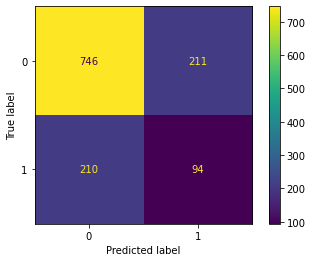

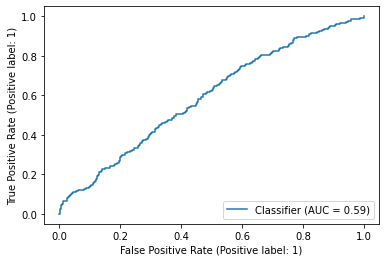

In [249]:
model = BTC_pro1()
model_name = 'models/' + str(model).split('(')[0] + '_tvt_' + str(25) + '.pt'
state_dict = torch.load(model_name)
model.load_state_dict(state_dict)


y_pred_list_rounded = []
y_pred_list = []
targets = []


model.eval()
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        targets.append(y_batch)

        y_test_pred = model(X_batch)
        y_test_pred = torch.sigmoid(y_test_pred)
        y_pred_tag = torch.round(y_test_pred)
        y_pred_list_rounded.append(y_pred_tag.cpu().numpy())
        y_pred_list.append(y_test_pred.cpu().numpy())

y_pred_list_rounded = [a.squeeze().tolist() for a in y_pred_list_rounded]
y_pred_list = [a.squeeze().tolist() for a in y_pred_list]
targets = [a.squeeze().tolist() for a in targets]


y_pred_list_rounded = [j for sub in y_pred_list_rounded for j in sub]
y_pred_list = [j for sub in y_pred_list for j in sub]
targets = [j for sub in targets for j in sub]

cm = confusion_matrix(targets, y_pred_list_rounded)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])
disp.plot()
TP, FP, TN, FN = cm[1,1], cm[0,1], cm[0,0], cm[1,0]
P = TP/(TP+FP)
R = TP/(TP+FN)
F1 = 2*P*R/(P+R)
print(f'recall : {R}')
print(f'precision : {P}')
print(f'F1 : {F1}')
print(f'acc : {(TP + TN)/(TP + TN + FP + FN)}')
RocCurveDisplay.from_predictions(targets, y_pred_list)

recall : 0.26644736842105265
precision : 0.38028169014084506
F1 : 0.3133462282398453
acc : 0.71847739888977


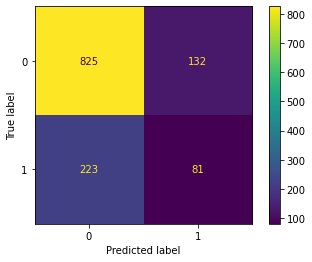

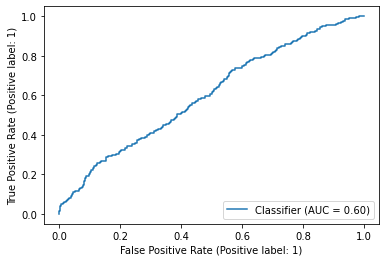

In [248]:
model = BTC_pro2()
model_name = 'models/' + str(model).split('(')[0] + '_tvt_' + str(25) + '.pt'
state_dict = torch.load(model_name)
model.load_state_dict(state_dict)


y_pred_list_rounded = []
y_pred_list = []
targets = []


model.eval()
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        targets.append(y_batch)

        y_test_pred = model(X_batch)
        y_test_pred = torch.sigmoid(y_test_pred)
        y_pred_tag = torch.round(y_test_pred)
        y_pred_list_rounded.append(y_pred_tag.cpu().numpy())
        y_pred_list.append(y_test_pred.cpu().numpy())

y_pred_list_rounded = [a.squeeze().tolist() for a in y_pred_list_rounded]
y_pred_list = [a.squeeze().tolist() for a in y_pred_list]
targets = [a.squeeze().tolist() for a in targets]


y_pred_list_rounded = [j for sub in y_pred_list_rounded for j in sub]
y_pred_list = [j for sub in y_pred_list for j in sub]
targets = [j for sub in targets for j in sub]

cm = confusion_matrix(targets, y_pred_list_rounded)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])
disp.plot()
TP, FP, TN, FN = cm[1,1], cm[0,1], cm[0,0], cm[1,0]
P = TP/(TP+FP)
R = TP/(TP+FN)
F1 = 2*P*R/(P+R)
print(f'recall : {R}')
print(f'precision : {P}')
print(f'F1 : {F1}')
print(f'acc : {(TP + TN)/(TP + TN + FP + FN)}')
RocCurveDisplay.from_predictions(targets, y_pred_list)

recall : 0.23355263157894737
precision : 0.3212669683257919
F1 : 0.2704761904761905
acc : 0.6962727993655828


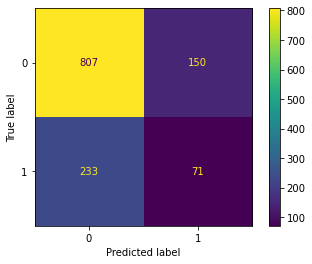

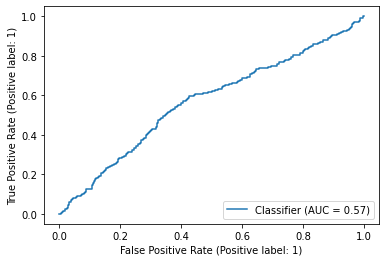

In [255]:
model = BTC_pro3()
model_name = 'models/' + str(model).split('(')[0] + '_tvt_' + str(25) + '.pt'
state_dict = torch.load(model_name)
model.load_state_dict(state_dict)


y_pred_list_rounded = []
y_pred_list = []
targets = []


model.eval()
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        targets.append(y_batch)

        y_test_pred = model(X_batch)
        y_test_pred = torch.sigmoid(y_test_pred)
        y_pred_tag = torch.round(y_test_pred)
        y_pred_list_rounded.append(y_pred_tag.cpu().numpy())
        y_pred_list.append(y_test_pred.cpu().numpy())

y_pred_list_rounded = [a.squeeze().tolist() for a in y_pred_list_rounded]
y_pred_list = [a.squeeze().tolist() for a in y_pred_list]
targets = [a.squeeze().tolist() for a in targets]


y_pred_list_rounded = [j for sub in y_pred_list_rounded for j in sub]
y_pred_list = [j for sub in y_pred_list for j in sub]
targets = [j for sub in targets for j in sub]

cm = confusion_matrix(targets, y_pred_list_rounded)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])
disp.plot()
TP, FP, TN, FN = cm[1,1], cm[0,1], cm[0,0], cm[1,0]
P = TP/(TP+FP)
R = TP/(TP+FN)
F1 = 2*P*R/(P+R)
print(f'recall : {R}')
print(f'precision : {P}')
print(f'F1 : {F1}')
print(f'acc : {(TP + TN)/(TP + TN + FP + FN)}')
RocCurveDisplay.from_predictions(targets, y_pred_list)

recall : 0.2565789473684211
precision : 0.35944700460829493
F1 : 0.2994241842610365
acc : 0.7105471847739889


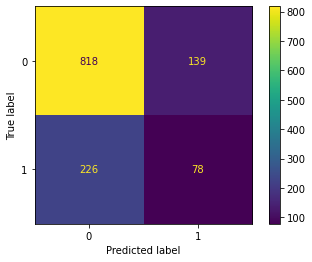

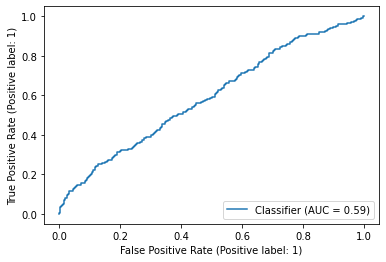

In [276]:
model = BTC_pro4()
model_name = 'models/' + str(model).split('(')[0] + '_tvt_' + str(27) + '.pt'
state_dict = torch.load(model_name)
model.load_state_dict(state_dict)


y_pred_list_rounded = []
y_pred_list = []
targets = []


model.eval()
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        targets.append(y_batch)

        y_test_pred = model(X_batch)
        y_test_pred = torch.sigmoid(y_test_pred)
        y_pred_tag = torch.round(y_test_pred)
        y_pred_list_rounded.append(y_pred_tag.cpu().numpy())
        y_pred_list.append(y_test_pred.cpu().numpy())

y_pred_list_rounded = [a.squeeze().tolist() for a in y_pred_list_rounded]
y_pred_list = [a.squeeze().tolist() for a in y_pred_list]
targets = [a.squeeze().tolist() for a in targets]


y_pred_list_rounded = [j for sub in y_pred_list_rounded for j in sub]
y_pred_list = [j for sub in y_pred_list for j in sub]
targets = [j for sub in targets for j in sub]

cm = confusion_matrix(targets, y_pred_list_rounded)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])
disp.plot()
TP, FP, TN, FN = cm[1,1], cm[0,1], cm[0,0], cm[1,0]
P = TP/(TP+FP)
R = TP/(TP+FN)
F1 = 2*P*R/(P+R)
print(f'recall : {R}')
print(f'precision : {P}')
print(f'F1 : {F1}')
print(f'acc : {(TP + TN)/(TP + TN + FP + FN)}')
RocCurveDisplay.from_predictions(targets, y_pred_list)

#### model pro5

In [265]:
class BTC_pro5(nn.Module):
    def __init__(self):
        super(BTC_pro5, self).__init__()
        # Number of input features is 12.
        self.layer_1 = nn.Linear(15, 30) 
        self.layer_2 = nn.Linear(30, 30)
        self.layer_out = nn.Linear(30, 1) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.1)
        self.batchnorm1 = nn.BatchNorm1d(30)
        self.batchnorm2 = nn.BatchNorm1d(30)
        
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.batchnorm1(x)
        x = self.relu(self.layer_2(x))
        x = self.batchnorm2(x)
        x = self.dropout(x)
        x = self.layer_out(x)
        
        return x

In [262]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [263]:
w = torch.tensor([0.5, 0.5]).to(device)

In [266]:
model = BTC_pro5()
model.to(device)

epochs = 50

cost = torch.nn.CrossEntropyLoss(weight = w)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
writer = SummaryWriter(log_dir = 'runs/' + str(model).split('(')[0])

for t in range(epochs):
    train(train_loader, model, cost, optimizer, t)
    test(test_loader, model, t)
    torch.save(model.state_dict(), 'models/' + str(model).split('(')[0] + '_tvt_' + str(t) + '.pt')

writer.close()
torch.cuda.empty_cache()

In [156]:
model.train()
for e in range(1, 100+1):
    epoch_loss = 0
    epoch_acc = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        
        y_pred = model(X_batch)
        
        loss = criterion(y_pred, y_batch.unsqueeze(1))
        acc = binary_acc(y_pred, y_batch.unsqueeze(1))
        
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cpu and cuda:0! (when checking arugment for argument mat1 in method wrapper_addmm)

In [267]:
device = torch.device("cpu")
print(device)

cpu


recall : 0.2730263157894737
precision : 0.3155893536121673
F1 : 0.29276895943562614
acc : 0.6819984139571769


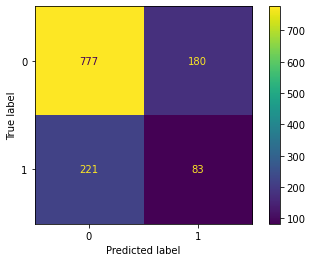

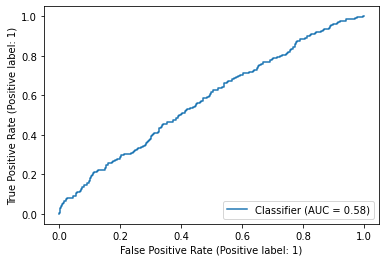

In [278]:
model = BTC_pro5()
model_name = 'models/' + str(model).split('(')[0] + '_tvt_' + str(20) + '.pt'
state_dict = torch.load(model_name)
model.load_state_dict(state_dict)


y_pred_list_rounded = []
y_pred_list = []
targets = []


model.eval()
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        targets.append(y_batch)

        y_test_pred = model(X_batch)
        y_test_pred = torch.sigmoid(y_test_pred)
        y_pred_tag = torch.round(y_test_pred)
        y_pred_list_rounded.append(y_pred_tag.cpu().numpy())
        y_pred_list.append(y_test_pred.cpu().numpy())

y_pred_list_rounded = [a.squeeze().tolist() for a in y_pred_list_rounded]
y_pred_list = [a.squeeze().tolist() for a in y_pred_list]
targets = [a.squeeze().tolist() for a in targets]


y_pred_list_rounded = [j for sub in y_pred_list_rounded for j in sub]
y_pred_list = [j for sub in y_pred_list for j in sub]
targets = [j for sub in targets for j in sub]

cm = confusion_matrix(targets, y_pred_list_rounded)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])
disp.plot()
TP, FP, TN, FN = cm[1,1], cm[0,1], cm[0,0], cm[1,0]
P = TP/(TP+FP)
R = TP/(TP+FN)
F1 = 2*P*R/(P+R)
print(f'recall : {R}')
print(f'precision : {P}')
print(f'F1 : {F1}')
print(f'acc : {(TP + TN)/(TP + TN + FP + FN)}')
RocCurveDisplay.from_predictions(targets, y_pred_list)

#### model pro6

In [269]:
class BTC_pro6(nn.Module):
    def __init__(self):
        super(BTC_pro6, self).__init__()
        # Number of input features is 12.
        self.layer_1 = nn.Linear(15, 45) 
        self.layer_2 = nn.Linear(45, 45)
        self.layer_out = nn.Linear(45, 1) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.1)
        self.batchnorm1 = nn.BatchNorm1d(45)
        self.batchnorm2 = nn.BatchNorm1d(45)
        
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.batchnorm1(x)
        x = self.relu(self.layer_2(x))
        x = self.batchnorm2(x)
        x = self.dropout(x)
        x = self.layer_out(x)
        
        return x

In [270]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [271]:
w = torch.tensor([0.5, 0.5]).to(device)

In [272]:
model = BTC_pro6()
model.to(device)

epochs = 50

cost = torch.nn.CrossEntropyLoss(weight = w)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
writer = SummaryWriter(log_dir = 'runs/' + str(model).split('(')[0])

for t in range(epochs):
    train(train_loader, model, cost, optimizer, t)
    test(test_loader, model, t)
    torch.save(model.state_dict(), 'models/' + str(model).split('(')[0] + '_tvt_' + str(t) + '.pt')

writer.close()
torch.cuda.empty_cache()

C:\Users\bakhi\anaconda3\lib\site-packages\torchmetrics\utilities\prints.py:36: UserWarning: Metric `AUROC` will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)


In [156]:
model.train()
for e in range(1, 100+1):
    epoch_loss = 0
    epoch_acc = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        
        y_pred = model(X_batch)
        
        loss = criterion(y_pred, y_batch.unsqueeze(1))
        acc = binary_acc(y_pred, y_batch.unsqueeze(1))
        
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cpu and cuda:0! (when checking arugment for argument mat1 in method wrapper_addmm)

In [274]:
device = torch.device("cpu")
print(device)

cpu


recall : 0.6842105263157895
precision : 0.2653061224489796
F1 : 0.3823529411764706
acc : 0.46708961141950833


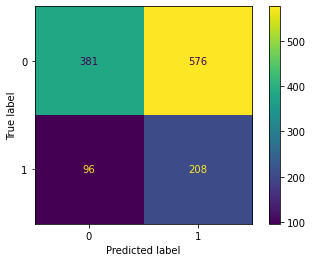

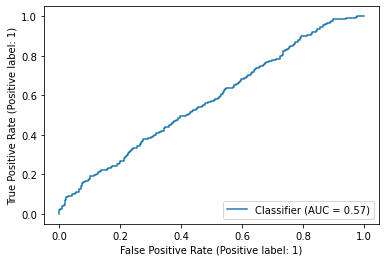

In [279]:
model = BTC_pro6()
model_name = 'models/' + str(model).split('(')[0] + '_tvt_' + str(5) + '.pt'
state_dict = torch.load(model_name)
model.load_state_dict(state_dict)


y_pred_list_rounded = []
y_pred_list = []
targets = []


model.eval()
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        targets.append(y_batch)

        y_test_pred = model(X_batch)
        y_test_pred = torch.sigmoid(y_test_pred)
        y_pred_tag = torch.round(y_test_pred)
        y_pred_list_rounded.append(y_pred_tag.cpu().numpy())
        y_pred_list.append(y_test_pred.cpu().numpy())

y_pred_list_rounded = [a.squeeze().tolist() for a in y_pred_list_rounded]
y_pred_list = [a.squeeze().tolist() for a in y_pred_list]
targets = [a.squeeze().tolist() for a in targets]


y_pred_list_rounded = [j for sub in y_pred_list_rounded for j in sub]
y_pred_list = [j for sub in y_pred_list for j in sub]
targets = [j for sub in targets for j in sub]

cm = confusion_matrix(targets, y_pred_list_rounded)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])
disp.plot()
TP, FP, TN, FN = cm[1,1], cm[0,1], cm[0,0], cm[1,0]
P = TP/(TP+FP)
R = TP/(TP+FN)
F1 = 2*P*R/(P+R)
print(f'recall : {R}')
print(f'precision : {P}')
print(f'F1 : {F1}')
print(f'acc : {(TP + TN)/(TP + TN + FP + FN)}')
RocCurveDisplay.from_predictions(targets, y_pred_list)

#### model pro7

In [280]:
class BTC_pro7(nn.Module):
    def __init__(self):
        super(BTC_pro7, self).__init__()
        # Number of input features is 12.
        self.layer_1 = nn.Linear(15, 30) 
        self.layer_2 = nn.Linear(30, 30)
        self.layer_out = nn.Linear(30, 1) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.1)
        self.batchnorm1 = nn.BatchNorm1d(30)
        self.batchnorm2 = nn.BatchNorm1d(30)
        
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.batchnorm1(x)
        x = self.relu(self.layer_2(x))
        x = self.batchnorm2(x)
        x = self.dropout(x)
        x = self.layer_out(x)
        
        return x

In [281]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [282]:
w = torch.tensor([0.4, 0.6]).to(device)

In [283]:
model = BTC_pro7()
model.to(device)

epochs = 50

cost = torch.nn.CrossEntropyLoss(weight = w)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
writer = SummaryWriter(log_dir = 'runs/' + str(model).split('(')[0])

for t in range(epochs):
    train(train_loader, model, cost, optimizer, t)
    test(test_loader, model, t)
    torch.save(model.state_dict(), 'models/' + str(model).split('(')[0] + '_tvt_' + str(t) + '.pt')

writer.close()
torch.cuda.empty_cache()

C:\Users\bakhi\anaconda3\lib\site-packages\torchmetrics\utilities\prints.py:36: UserWarning: Metric `AUROC` will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)


In [156]:
model.train()
for e in range(1, 100+1):
    epoch_loss = 0
    epoch_acc = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        
        y_pred = model(X_batch)
        
        loss = criterion(y_pred, y_batch.unsqueeze(1))
        acc = binary_acc(y_pred, y_batch.unsqueeze(1))
        
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cpu and cuda:0! (when checking arugment for argument mat1 in method wrapper_addmm)

In [284]:
device = torch.device("cpu")
print(device)

cpu


recall : 0.34210526315789475
precision : 0.30678466076696165
F1 : 0.32348367029548986
acc : 0.655035685963521


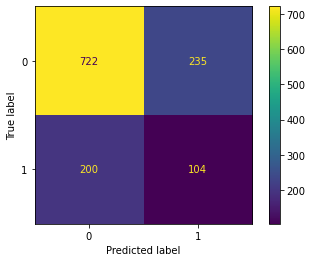

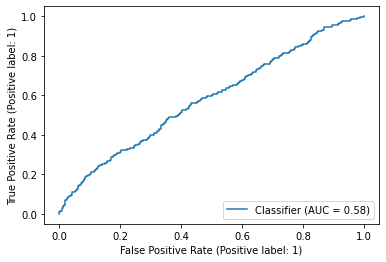

In [288]:
model = BTC_pro7()
model_name = 'models/' + str(model).split('(')[0] + '_tvt_' + str(35) + '.pt'
state_dict = torch.load(model_name)
model.load_state_dict(state_dict)


y_pred_list_rounded = []
y_pred_list = []
targets = []


model.eval()
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        targets.append(y_batch)

        y_test_pred = model(X_batch)
        y_test_pred = torch.sigmoid(y_test_pred)
        y_pred_tag = torch.round(y_test_pred)
        y_pred_list_rounded.append(y_pred_tag.cpu().numpy())
        y_pred_list.append(y_test_pred.cpu().numpy())

y_pred_list_rounded = [a.squeeze().tolist() for a in y_pred_list_rounded]
y_pred_list = [a.squeeze().tolist() for a in y_pred_list]
targets = [a.squeeze().tolist() for a in targets]


y_pred_list_rounded = [j for sub in y_pred_list_rounded for j in sub]
y_pred_list = [j for sub in y_pred_list for j in sub]
targets = [j for sub in targets for j in sub]

cm = confusion_matrix(targets, y_pred_list_rounded)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])
disp.plot()
TP, FP, TN, FN = cm[1,1], cm[0,1], cm[0,0], cm[1,0]
P = TP/(TP+FP)
R = TP/(TP+FN)
F1 = 2*P*R/(P+R)
print(f'recall : {R}')
print(f'precision : {P}')
print(f'F1 : {F1}')
print(f'acc : {(TP + TN)/(TP + TN + FP + FN)}')
RocCurveDisplay.from_predictions(targets, y_pred_list)

#### model pro9

In [298]:
class BTC_pro9(nn.Module):
    def __init__(self):
        super(BTC_pro9, self).__init__()
        # Number of input features is 12.
        self.layer_1 = nn.Linear(15, 30) 

        self.layer_out = nn.Linear(30, 1) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.1)
        self.batchnorm1 = nn.BatchNorm1d(30)
        
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.batchnorm1(x)
        x = self.dropout(x)
        x = self.layer_out(x)
        
        return x

In [299]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [300]:
w = torch.tensor([0.5, 0.5]).to(device)

In [301]:
model = BTC_pro9()
model.to(device)

epochs = 50

cost = torch.nn.CrossEntropyLoss(weight = w)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
writer = SummaryWriter(log_dir = 'runs/' + str(model).split('(')[0])

for t in range(epochs):
    train(train_loader, model, cost, optimizer, t)
    test(test_loader, model, t)
    torch.save(model.state_dict(), 'models/' + str(model).split('(')[0] + '_tvt_' + str(t) + '.pt')

writer.close()
torch.cuda.empty_cache()

In [156]:
model.train()
for e in range(1, 100+1):
    epoch_loss = 0
    epoch_acc = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        
        y_pred = model(X_batch)
        
        loss = criterion(y_pred, y_batch.unsqueeze(1))
        acc = binary_acc(y_pred, y_batch.unsqueeze(1))
        
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cpu and cuda:0! (when checking arugment for argument mat1 in method wrapper_addmm)

In [303]:
device = torch.device("cpu")
print(device)

cpu


recall : 0.35526315789473684
precision : 0.30337078651685395
F1 : 0.3272727272727273
acc : 0.647898493259318


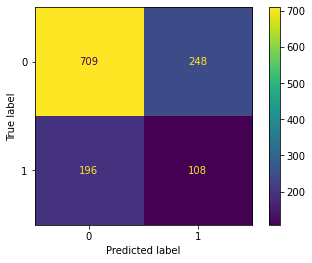

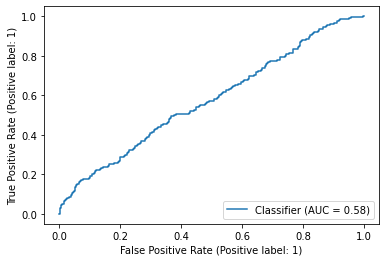

In [308]:
model = BTC_pro9()
model_name = 'models/' + str(model).split('(')[0] + '_tvt_' + str(10) + '.pt'
state_dict = torch.load(model_name)
model.load_state_dict(state_dict)


y_pred_list_rounded = []
y_pred_list = []
targets = []


model.eval()
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        targets.append(y_batch)

        y_test_pred = model(X_batch)
        y_test_pred = torch.sigmoid(y_test_pred)
        y_pred_tag = torch.round(y_test_pred)
        y_pred_list_rounded.append(y_pred_tag.cpu().numpy())
        y_pred_list.append(y_test_pred.cpu().numpy())

y_pred_list_rounded = [a.squeeze().tolist() for a in y_pred_list_rounded]
y_pred_list = [a.squeeze().tolist() for a in y_pred_list]
targets = [a.squeeze().tolist() for a in targets]


y_pred_list_rounded = [j for sub in y_pred_list_rounded for j in sub]
y_pred_list = [j for sub in y_pred_list for j in sub]
targets = [j for sub in targets for j in sub]

cm = confusion_matrix(targets, y_pred_list_rounded)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])
disp.plot()
TP, FP, TN, FN = cm[1,1], cm[0,1], cm[0,0], cm[1,0]
P = TP/(TP+FP)
R = TP/(TP+FN)
F1 = 2*P*R/(P+R)
print(f'recall : {R}')
print(f'precision : {P}')
print(f'F1 : {F1}')
print(f'acc : {(TP + TN)/(TP + TN + FP + FN)}')
RocCurveDisplay.from_predictions(targets, y_pred_list)

#### model pro10

In [309]:
class BTC_pro10(nn.Module):
    def __init__(self):
        super(BTC_pro10, self).__init__()
        # Number of input features is 12.
        self.layer_1 = nn.Linear(15, 30) 

        self.layer_out = nn.Linear(30, 1) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.1)
        self.batchnorm1 = nn.BatchNorm1d(30)
        
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.batchnorm1(x)
        x = self.dropout(x)
        x = self.layer_out(x)
        
        return x

In [299]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [310]:
w = torch.tensor([0.6, 0.4]).to(device)

In [314]:
model = BTC_pro10()
model.to(device)

epochs = 50

cost = torch.nn.CrossEntropyLoss(weight = w)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
writer = SummaryWriter(log_dir = 'runs/' + str(model).split('(')[0])

for t in range(epochs):
    train(train_loader, model, cost, optimizer, t)
    test(valid_loader, model, t)
    torch.save(model.state_dict(), 'models/' + str(model).split('(')[0] + '_tvt_' + str(t) + '.pt')

writer.close()
torch.cuda.empty_cache()

C:\Users\bakhi\anaconda3\lib\site-packages\torchmetrics\utilities\prints.py:36: UserWarning: Metric `AUROC` will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)
C:\Users\bakhi\anaconda3\lib\site-packages\torchmetrics\utilities\prints.py:36: UserWarning: No positive samples in targets, true positive value should be meaningless. Returning zero tensor in true positive score
  warnings.warn(*args, **kwargs)


In [156]:
model.train()
for e in range(1, 100+1):
    epoch_loss = 0
    epoch_acc = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        
        y_pred = model(X_batch)
        
        loss = criterion(y_pred, y_batch.unsqueeze(1))
        acc = binary_acc(y_pred, y_batch.unsqueeze(1))
        
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cpu and cuda:0! (when checking arugment for argument mat1 in method wrapper_addmm)

In [315]:
device = torch.device("cpu")
print(device)

cpu


recall : 0.21710526315789475
precision : 0.3473684210526316
F1 : 0.26720647773279355
acc : 0.7129262490087233


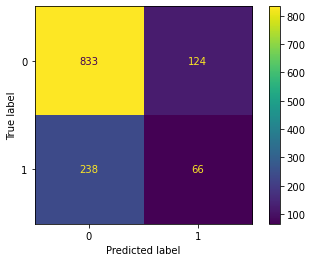

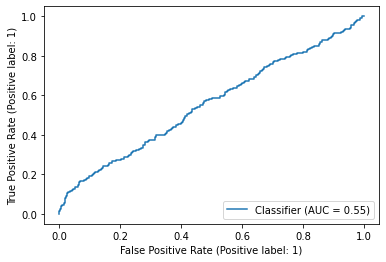

In [320]:
model = BTC_pro10()
model_name = 'models/' + str(model).split('(')[0] + '_tvt_' + str(20) + '.pt'
state_dict = torch.load(model_name)
model.load_state_dict(state_dict)


y_pred_list_rounded = []
y_pred_list = []
targets = []


model.eval()
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        targets.append(y_batch)

        y_test_pred = model(X_batch)
        y_test_pred = torch.sigmoid(y_test_pred)
        y_pred_tag = torch.round(y_test_pred)
        y_pred_list_rounded.append(y_pred_tag.cpu().numpy())
        y_pred_list.append(y_test_pred.cpu().numpy())

y_pred_list_rounded = [a.squeeze().tolist() for a in y_pred_list_rounded]
y_pred_list = [a.squeeze().tolist() for a in y_pred_list]
targets = [a.squeeze().tolist() for a in targets]


y_pred_list_rounded = [j for sub in y_pred_list_rounded for j in sub]
y_pred_list = [j for sub in y_pred_list for j in sub]
targets = [j for sub in targets for j in sub]

cm = confusion_matrix(targets, y_pred_list_rounded)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])
disp.plot()
TP, FP, TN, FN = cm[1,1], cm[0,1], cm[0,0], cm[1,0]
P = TP/(TP+FP)
R = TP/(TP+FN)
F1 = 2*P*R/(P+R)
print(f'recall : {R}')
print(f'precision : {P}')
print(f'F1 : {F1}')
print(f'acc : {(TP + TN)/(TP + TN + FP + FN)}')
RocCurveDisplay.from_predictions(targets, y_pred_list)

#### model pro11

In [321]:
class BTC_pro11(nn.Module):
    def __init__(self):
        super(BTC_pro11, self).__init__()
        # Number of input features is 12.
        self.layer_1 = nn.Linear(15, 30) 
        self.layer_2 = nn.Linear(30, 30)
        self.layer_out = nn.Linear(30, 1) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.1)
        self.batchnorm1 = nn.BatchNorm1d(30)
        self.batchnorm2 = nn.BatchNorm1d(30)
        
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.batchnorm1(x)
        x = self.relu(self.layer_2(x))
        x = self.batchnorm2(x)
        x = self.dropout(x)
        x = self.layer_out(x)
        
        return x

In [322]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [323]:
w = torch.tensor([0.5, 0.5]).to(device)

In [324]:
model = BTC_pro11()
model.to(device)

epochs = 50

cost = torch.nn.CrossEntropyLoss(weight = w)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
writer = SummaryWriter(log_dir = 'runs/' + str(model).split('(')[0])

for t in range(epochs):
    train(train_loader, model, cost, optimizer, t)
    test(valid_loader, model, t)
    torch.save(model.state_dict(), 'models/' + str(model).split('(')[0] + '_tvt_' + str(t) + '.pt')

writer.close()
torch.cuda.empty_cache()

C:\Users\bakhi\anaconda3\lib\site-packages\torchmetrics\utilities\prints.py:36: UserWarning: Metric `AUROC` will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)


In [156]:
model.train()
for e in range(1, 100+1):
    epoch_loss = 0
    epoch_acc = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        
        y_pred = model(X_batch)
        
        loss = criterion(y_pred, y_batch.unsqueeze(1))
        acc = binary_acc(y_pred, y_batch.unsqueeze(1))
        
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cpu and cuda:0! (when checking arugment for argument mat1 in method wrapper_addmm)

In [325]:
device = torch.device("cpu")
print(device)

cpu


recall : 0.3355263157894737
precision : 0.31974921630094044
F1 : 0.32744783306581055
acc : 0.6677240285487708


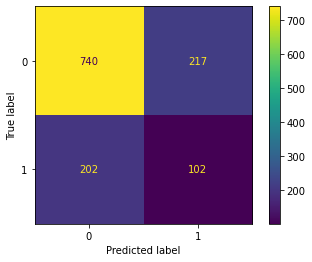

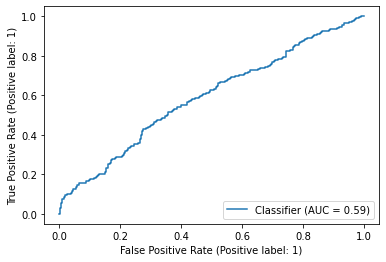

In [326]:
model = BTC_pro11()
model_name = 'models/' + str(model).split('(')[0] + '_tvt_' + str(20) + '.pt'
state_dict = torch.load(model_name)
model.load_state_dict(state_dict)


y_pred_list_rounded = []
y_pred_list = []
targets = []


model.eval()
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        targets.append(y_batch)

        y_test_pred = model(X_batch)
        y_test_pred = torch.sigmoid(y_test_pred)
        y_pred_tag = torch.round(y_test_pred)
        y_pred_list_rounded.append(y_pred_tag.cpu().numpy())
        y_pred_list.append(y_test_pred.cpu().numpy())

y_pred_list_rounded = [a.squeeze().tolist() for a in y_pred_list_rounded]
y_pred_list = [a.squeeze().tolist() for a in y_pred_list]
targets = [a.squeeze().tolist() for a in targets]


y_pred_list_rounded = [j for sub in y_pred_list_rounded for j in sub]
y_pred_list = [j for sub in y_pred_list for j in sub]
targets = [j for sub in targets for j in sub]

cm = confusion_matrix(targets, y_pred_list_rounded)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])
disp.plot()
TP, FP, TN, FN = cm[1,1], cm[0,1], cm[0,0], cm[1,0]
P = TP/(TP+FP)
R = TP/(TP+FN)
F1 = 2*P*R/(P+R)
print(f'recall : {R}')
print(f'precision : {P}')
print(f'F1 : {F1}')
print(f'acc : {(TP + TN)/(TP + TN + FP + FN)}')
RocCurveDisplay.from_predictions(targets, y_pred_list)

### trying all featuries

In [350]:
df = pd.read_csv('BTC_dataset.csv')

In [352]:
list_columns = ['pre_pri_ch_1',
       'pre_pri_ch_24', 'pre_pri_ch_2', 'pre_pri_ch_3', 'pre_pri_ch_4',
       'pre_pri_ch_12','Vol_4','Vol_12', 'Vol_24', 'Vol_week', 'Vol_month', 'Max_4', 'Min_4', 'Max_12',
               'Min_12', 'Max_24', 'Min_24', 'Max_week', 'Min_week', 'Max_month','Min_month',
                       'ADX', '-DI', '+DI', 'RSI', 'ADX_4h', '-DI_4h',
                       '+DI_4h', 'RSI_4h', 'ADX_12h', '-DI_12h', '+DI_12h', 'RSI_12h',
                       'ADX_24h', '-DI_24h', '+DI_24h', 'RSI_24h', 
                'target']

In [353]:
df['target'] = df['price_change_4'].apply(lambda x: 1 if x>=0.75 else 0)

In [354]:
df = df[list_columns]

<AxesSubplot:xlabel='target', ylabel='count'>

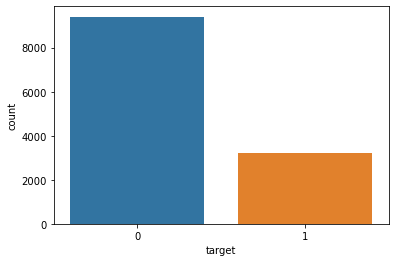

In [355]:
sns.countplot(x = 'target', data=df_1hour)

In [356]:
df['target'] = df['target'].astype('category')

<ipython-input-356-2226efc13b9c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'] = df['target'].astype('category')


In [357]:
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [359]:
lenght_train = int(len(df)*0.7)
lenght_valid = int(len(df)*0.2)
lenght_test = len(df) - lenght_train - lenght_valid

In [374]:
X_train = X[:lenght_train]
X_valid = X[lenght_train : lenght_train + lenght_valid]
X_test = X[-lenght_test:]

In [361]:
y_train = y[:lenght_train]
y_valid = y[lenght_train : lenght_train + lenght_valid]
y_test = y[-lenght_test:]

In [362]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
X_test = scaler.transform(X_test)

In [363]:
EPOCHS = 50
BATCH_SIZE = 64
LEARNING_RATE = 0.001

In [364]:
## train data
class TrainData(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)


train_data = TrainData(torch.FloatTensor(X_train), 
                       torch.FloatTensor(y_train.values))

## train data
class ValidData(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)


valid_data = ValidData(torch.FloatTensor(X_valid), 
                       torch.FloatTensor(y_valid.values))

## test data    
class TestData(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)
    

test_data = TestData(torch.FloatTensor(X_test), 
                     torch.FloatTensor(y_test.values))

In [365]:
train_loader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
valid_loader = DataLoader(dataset=valid_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=BATCH_SIZE, shuffle=True)

#### model pro100

In [368]:
class BTC_pro100(nn.Module):
    def __init__(self):
        super(BTC_pro100, self).__init__()
        # Number of input features is 12.
        self.layer_1 = nn.Linear(37, 64) 
        self.layer_2 = nn.Linear(64, 64)
        self.layer_out = nn.Linear(64, 1) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.1)
        self.batchnorm1 = nn.BatchNorm1d(64)
        self.batchnorm2 = nn.BatchNorm1d(64)
        
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.batchnorm1(x)
        x = self.relu(self.layer_2(x))
        x = self.batchnorm2(x)
        x = self.dropout(x)
        x = self.layer_out(x)
        
        return x

In [369]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [371]:
model = BTC_pro100()
model.to(device)

epochs = 50

cost = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
writer = SummaryWriter(log_dir = 'runs/' + str(model).split('(')[0])

for t in range(epochs):
    train(train_loader, model, cost, optimizer, t)
    test(valid_loader, model, t)
    torch.save(model.state_dict(), 'models/' + str(model).split('(')[0] + '_tvt_' + str(t) + '.pt')

writer.close()
torch.cuda.empty_cache()

C:\Users\bakhi\anaconda3\lib\site-packages\torchmetrics\utilities\prints.py:36: UserWarning: Metric `AUROC` will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)
C:\Users\bakhi\anaconda3\lib\site-packages\torchmetrics\utilities\prints.py:36: UserWarning: No positive samples in targets, true positive value should be meaningless. Returning zero tensor in true positive score
  warnings.warn(*args, **kwargs)


In [372]:
device = torch.device("cpu")
print(device)

cpu


recall : 0.2532894736842105
precision : 0.4782608695652174
F1 : 0.3311827956989247
acc : 0.753370340999207


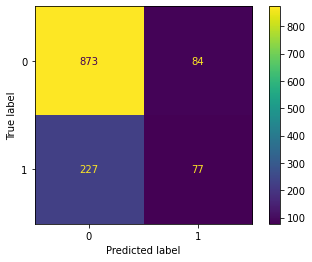

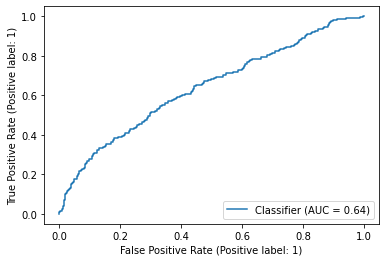

In [387]:
model = BTC_pro100()
model_name = 'models/' + str(model).split('(')[0] + '_tvt_' + str(20) + '.pt'
state_dict = torch.load(model_name)
model.load_state_dict(state_dict)


y_pred_list_rounded = []
y_pred_list = []
targets = []


model.eval()
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        targets.append(y_batch)

        y_test_pred = model(X_batch)
        y_test_pred = torch.sigmoid(y_test_pred)
        y_pred_tag = torch.round(y_test_pred)
        y_pred_list_rounded.append(y_pred_tag.cpu().numpy())
        y_pred_list.append(y_test_pred.cpu().numpy())

y_pred_list_rounded = [a.squeeze().tolist() for a in y_pred_list_rounded]
y_pred_list = [a.squeeze().tolist() for a in y_pred_list]
targets = [a.squeeze().tolist() for a in targets]


y_pred_list_rounded = [j for sub in y_pred_list_rounded for j in sub]
y_pred_list = [j for sub in y_pred_list for j in sub]
targets = [j for sub in targets for j in sub]

cm = confusion_matrix(targets, y_pred_list_rounded)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])
disp.plot()
TP, FP, TN, FN = cm[1,1], cm[0,1], cm[0,0], cm[1,0]
P = TP/(TP+FP)
R = TP/(TP+FN)
F1 = 2*P*R/(P+R)
print(f'recall : {R}')
print(f'precision : {P}')
print(f'F1 : {F1}')
print(f'acc : {(TP + TN)/(TP + TN + FP + FN)}')
RocCurveDisplay.from_predictions(targets, y_pred_list)

#### model pro101

In [380]:
# add one more layer to model pro100 
class BTC_pro101(nn.Module):
    def __init__(self):
        super(BTC_pro101, self).__init__()
        # Number of input features is 12.
        self.layer_1 = nn.Linear(37, 64) 
        self.layer_2 = nn.Linear(64, 64)
        self.layer_3 = nn.Linear(64, 32)
        self.layer_out = nn.Linear(32, 1) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.1)
        self.batchnorm1 = nn.BatchNorm1d(64)
        self.batchnorm2 = nn.BatchNorm1d(64)
        self.batchnorm3 = nn.BatchNorm1d(32)
        
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.batchnorm1(x)
        
        x = self.relu(self.layer_2(x))
        x = self.batchnorm2(x)
        
        x = self.relu(self.layer_3(x))
        x = self.batchnorm3(x)
        
        x = self.dropout(x)
        x = self.layer_out(x)
        
        return x

In [381]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [382]:
model = BTC_pro101()
model.to(device)

epochs = 50

cost = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
writer = SummaryWriter(log_dir = 'runs/' + str(model).split('(')[0])

for t in range(epochs):
    train(train_loader, model, cost, optimizer, t)
    test(valid_loader, model, t)
    torch.save(model.state_dict(), 'models/' + str(model).split('(')[0] + '_tvt_' + str(t) + '.pt')

writer.close()
torch.cuda.empty_cache()

C:\Users\bakhi\anaconda3\lib\site-packages\torchmetrics\utilities\prints.py:36: UserWarning: Metric `AUROC` will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)
C:\Users\bakhi\anaconda3\lib\site-packages\torchmetrics\utilities\prints.py:36: UserWarning: No positive samples in targets, true positive value should be meaningless. Returning zero tensor in true positive score
  warnings.warn(*args, **kwargs)


In [384]:
device = torch.device("cpu")
print(device)

cpu


recall : 0.3717105263157895
precision : 0.35987261146496813
F1 : 0.3656957928802589
acc : 0.6891356066613799


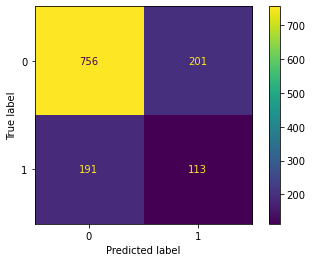

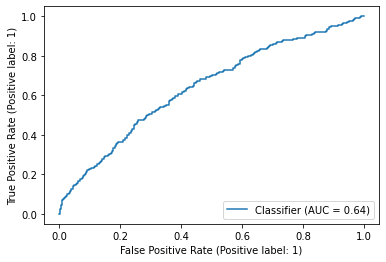

In [415]:
model = BTC_pro101()
model_name = 'models/' + str(model).split('(')[0] + '_tvt_' + str(20) + '.pt'
state_dict = torch.load(model_name)
model.load_state_dict(state_dict)


y_pred_list_rounded = []
y_pred_list = []
targets = []


model.eval()
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        targets.append(y_batch)

        y_test_pred = model(X_batch)
        y_test_pred = torch.sigmoid(y_test_pred)
        y_pred_tag = torch.round(y_test_pred)
        y_pred_list_rounded.append(y_pred_tag.cpu().numpy())
        y_pred_list.append(y_test_pred.cpu().numpy())

y_pred_list_rounded = [a.squeeze().tolist() for a in y_pred_list_rounded]
y_pred_list = [a.squeeze().tolist() for a in y_pred_list]
targets = [a.squeeze().tolist() for a in targets]


y_pred_list_rounded = [j for sub in y_pred_list_rounded for j in sub]
y_pred_list = [j for sub in y_pred_list for j in sub]
targets = [j for sub in targets for j in sub]

cm = confusion_matrix(targets, y_pred_list_rounded)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])
disp.plot()
TP, FP, TN, FN = cm[1,1], cm[0,1], cm[0,0], cm[1,0]
P = TP/(TP+FP)
R = TP/(TP+FN)
F1 = 2*P*R/(P+R)
print(f'recall : {R}')
print(f'precision : {P}')
print(f'F1 : {F1}')
print(f'acc : {(TP + TN)/(TP + TN + FP + FN)}')
RocCurveDisplay.from_predictions(targets, y_pred_list)

#### model pro102

In [389]:
class BTC_pro102(nn.Module):
    def __init__(self):
        super(BTC_pro102, self).__init__()
        # Number of input features is 12.
        self.layer_1 = nn.Linear(37, 128) 
        self.layer_2 = nn.Linear(128, 128)
        self.layer_out = nn.Linear(128, 1) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.1)
        self.batchnorm1 = nn.BatchNorm1d(128)
        self.batchnorm2 = nn.BatchNorm1d(128)
        
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.batchnorm1(x)
        x = self.relu(self.layer_2(x))
        x = self.batchnorm2(x)
        x = self.dropout(x)
        x = self.layer_out(x)
        
        return x

In [390]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [391]:
model = BTC_pro102()
model.to(device)

epochs = 50

cost = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
writer = SummaryWriter(log_dir = 'runs/' + str(model).split('(')[0])

for t in range(epochs):
    train(train_loader, model, cost, optimizer, t)
    test(valid_loader, model, t)
    torch.save(model.state_dict(), 'models/' + str(model).split('(')[0] + '_tvt_' + str(t) + '.pt')

writer.close()
torch.cuda.empty_cache()

C:\Users\bakhi\anaconda3\lib\site-packages\torchmetrics\utilities\prints.py:36: UserWarning: Metric `AUROC` will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)


In [393]:
device = torch.device("cpu")
print(device)

cpu


recall : 0.28618421052631576
precision : 0.3972602739726027
F1 : 0.3326959847036329
acc : 0.7232355273592387


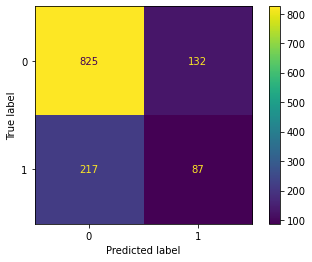

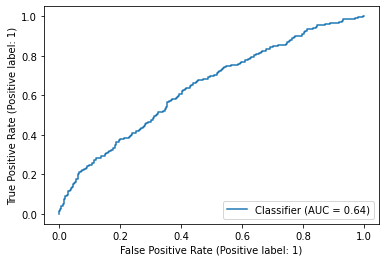

In [416]:
model = BTC_pro102()
model_name = 'models/' + str(model).split('(')[0] + '_tvt_' + str(20) + '.pt'
state_dict = torch.load(model_name)
model.load_state_dict(state_dict)


y_pred_list_rounded = []
y_pred_list = []
targets = []


model.eval()
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        targets.append(y_batch)

        y_test_pred = model(X_batch)
        y_test_pred = torch.sigmoid(y_test_pred)
        y_pred_tag = torch.round(y_test_pred)
        y_pred_list_rounded.append(y_pred_tag.cpu().numpy())
        y_pred_list.append(y_test_pred.cpu().numpy())

y_pred_list_rounded = [a.squeeze().tolist() for a in y_pred_list_rounded]
y_pred_list = [a.squeeze().tolist() for a in y_pred_list]
targets = [a.squeeze().tolist() for a in targets]


y_pred_list_rounded = [j for sub in y_pred_list_rounded for j in sub]
y_pred_list = [j for sub in y_pred_list for j in sub]
targets = [j for sub in targets for j in sub]

cm = confusion_matrix(targets, y_pred_list_rounded)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])
disp.plot()
TP, FP, TN, FN = cm[1,1], cm[0,1], cm[0,0], cm[1,0]
P = TP/(TP+FP)
R = TP/(TP+FN)
F1 = 2*P*R/(P+R)
print(f'recall : {R}')
print(f'precision : {P}')
print(f'F1 : {F1}')
print(f'acc : {(TP + TN)/(TP + TN + FP + FN)}')
RocCurveDisplay.from_predictions(targets, y_pred_list)

#### model pro103

In [399]:
# add one more layer to model pro100 
class BTC_pro103(nn.Module):
    def __init__(self):
        super(BTC_pro103, self).__init__()
        # Number of input features is 12.
        self.layer_1 = nn.Linear(37, 128) 
        self.layer_2 = nn.Linear(128, 128)
        self.layer_3 = nn.Linear(128, 64)
        self.layer_out = nn.Linear(64, 1) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.1)
        self.batchnorm1 = nn.BatchNorm1d(128)
        self.batchnorm2 = nn.BatchNorm1d(128)
        self.batchnorm3 = nn.BatchNorm1d(64)
        
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.batchnorm1(x)
        
        x = self.relu(self.layer_2(x))
        x = self.batchnorm2(x)
        
        x = self.relu(self.layer_3(x))
        x = self.batchnorm3(x)
        
        x = self.dropout(x)
        x = self.layer_out(x)
        
        return x

In [400]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [401]:
model = BTC_pro103()
model.to(device)

epochs = 50

cost = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
writer = SummaryWriter(log_dir = 'runs/' + str(model).split('(')[0])

for t in range(epochs):
    train(train_loader, model, cost, optimizer, t)
    test(valid_loader, model, t)
    torch.save(model.state_dict(), 'models/' + str(model).split('(')[0] + '_tvt_' + str(t) + '.pt')

writer.close()
torch.cuda.empty_cache()

C:\Users\bakhi\anaconda3\lib\site-packages\torchmetrics\utilities\prints.py:36: UserWarning: Metric `AUROC` will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)


In [402]:
device = torch.device("cpu")
print(device)

cpu


recall : 0.35526315789473684
precision : 0.3450479233226837
F1 : 0.3500810372771475
acc : 0.6819984139571769


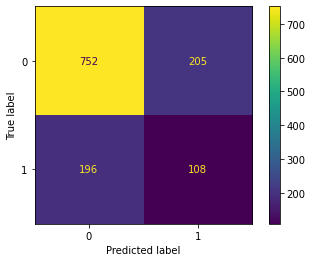

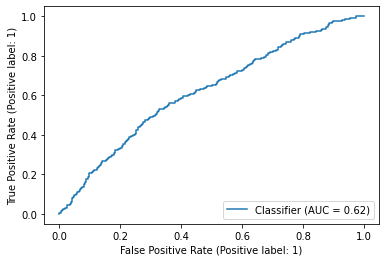

In [417]:
model = BTC_pro103()
model_name = 'models/' + str(model).split('(')[0] + '_tvt_' + str(20) + '.pt'
state_dict = torch.load(model_name)
model.load_state_dict(state_dict)


y_pred_list_rounded = []
y_pred_list = []
targets = []


model.eval()
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        targets.append(y_batch)

        y_test_pred = model(X_batch)
        y_test_pred = torch.sigmoid(y_test_pred)
        y_pred_tag = torch.round(y_test_pred)
        y_pred_list_rounded.append(y_pred_tag.cpu().numpy())
        y_pred_list.append(y_test_pred.cpu().numpy())

y_pred_list_rounded = [a.squeeze().tolist() for a in y_pred_list_rounded]
y_pred_list = [a.squeeze().tolist() for a in y_pred_list]
targets = [a.squeeze().tolist() for a in targets]


y_pred_list_rounded = [j for sub in y_pred_list_rounded for j in sub]
y_pred_list = [j for sub in y_pred_list for j in sub]
targets = [j for sub in targets for j in sub]

cm = confusion_matrix(targets, y_pred_list_rounded)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])
disp.plot()
TP, FP, TN, FN = cm[1,1], cm[0,1], cm[0,0], cm[1,0]
P = TP/(TP+FP)
R = TP/(TP+FN)
F1 = 2*P*R/(P+R)
print(f'recall : {R}')
print(f'precision : {P}')
print(f'F1 : {F1}')
print(f'acc : {(TP + TN)/(TP + TN + FP + FN)}')
RocCurveDisplay.from_predictions(targets, y_pred_list)

#### model pro104

In [404]:
# add one more layer to model pro100 
class BTC_pro104(nn.Module):
    def __init__(self):
        super(BTC_pro104, self).__init__()
        # Number of input features is 12.
        self.layer_1 = nn.Linear(37, 64) 
        self.layer_2 = nn.Linear(64, 64)
        self.layer_3 = nn.Linear(64, 32)
        self.layer_4 = nn.Linear(32, 16)
        self.layer_out = nn.Linear(16, 1) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.1)
        self.batchnorm1 = nn.BatchNorm1d(64)
        self.batchnorm2 = nn.BatchNorm1d(64)
        self.batchnorm3 = nn.BatchNorm1d(32)
        self.batchnorm4 = nn.BatchNorm1d(16)
        
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.batchnorm1(x)
        
        x = self.relu(self.layer_2(x))
        x = self.batchnorm2(x)
        
        x = self.relu(self.layer_3(x))
        x = self.batchnorm3(x)
        
        x = self.relu(self.layer_4(x))
        x = self.batchnorm4(x)
        
        x = self.dropout(x)
        x = self.layer_out(x)
        
        return x

In [405]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [406]:
model = BTC_pro104()
model.to(device)

epochs = 50

cost = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
writer = SummaryWriter(log_dir = 'runs/' + str(model).split('(')[0])

for t in range(epochs):
    train(train_loader, model, cost, optimizer, t)
    test(valid_loader, model, t)
    torch.save(model.state_dict(), 'models/' + str(model).split('(')[0] + '_tvt_' + str(t) + '.pt')

writer.close()
torch.cuda.empty_cache()

C:\Users\bakhi\anaconda3\lib\site-packages\torchmetrics\utilities\prints.py:36: UserWarning: Metric `AUROC` will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)


In [384]:
device = torch.device("cpu")
print(device)

cpu


recall : 0.3881578947368421
precision : 0.33146067415730335
F1 : 0.3575757575757576
acc : 0.6637589214908802


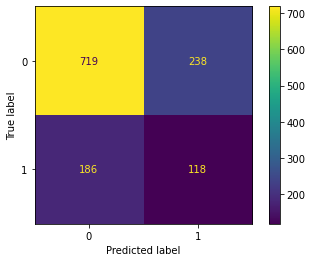

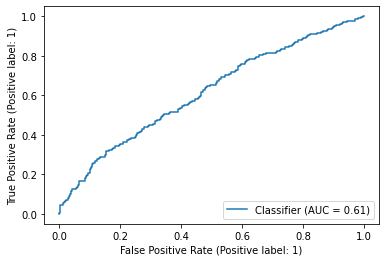

In [418]:
model = BTC_pro104()
model_name = 'models/' + str(model).split('(')[0] + '_tvt_' + str(20) + '.pt'
state_dict = torch.load(model_name)
model.load_state_dict(state_dict)


y_pred_list_rounded = []
y_pred_list = []
targets = []


model.eval()
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        targets.append(y_batch)

        y_test_pred = model(X_batch)
        y_test_pred = torch.sigmoid(y_test_pred)
        y_pred_tag = torch.round(y_test_pred)
        y_pred_list_rounded.append(y_pred_tag.cpu().numpy())
        y_pred_list.append(y_test_pred.cpu().numpy())

y_pred_list_rounded = [a.squeeze().tolist() for a in y_pred_list_rounded]
y_pred_list = [a.squeeze().tolist() for a in y_pred_list]
targets = [a.squeeze().tolist() for a in targets]


y_pred_list_rounded = [j for sub in y_pred_list_rounded for j in sub]
y_pred_list = [j for sub in y_pred_list for j in sub]
targets = [j for sub in targets for j in sub]

cm = confusion_matrix(targets, y_pred_list_rounded)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])
disp.plot()
TP, FP, TN, FN = cm[1,1], cm[0,1], cm[0,0], cm[1,0]
P = TP/(TP+FP)
R = TP/(TP+FN)
F1 = 2*P*R/(P+R)
print(f'recall : {R}')
print(f'precision : {P}')
print(f'F1 : {F1}')
print(f'acc : {(TP + TN)/(TP + TN + FP + FN)}')
RocCurveDisplay.from_predictions(targets, y_pred_list)

#### model pro105

In [407]:
# add one more layer to model pro100 
class BTC_pro105(nn.Module):
    def __init__(self):
        super(BTC_pro105, self).__init__()
        # Number of input features is 12.
        self.layer_1 = nn.Linear(37, 64) 
        self.layer_2 = nn.Linear(64, 64)
        self.layer_3 = nn.Linear(64, 32)
        self.layer_4 = nn.Linear(32, 16)
        self.layer_5 = nn.Linear(16, 8)
        self.layer_out = nn.Linear(8, 1) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.1)
        self.batchnorm1 = nn.BatchNorm1d(64)
        self.batchnorm2 = nn.BatchNorm1d(64)
        self.batchnorm3 = nn.BatchNorm1d(32)
        self.batchnorm4 = nn.BatchNorm1d(16)
        self.batchnorm5 = nn.BatchNorm1d(8)
        
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.batchnorm1(x)
        
        x = self.relu(self.layer_2(x))
        x = self.batchnorm2(x)
        
        x = self.relu(self.layer_3(x))
        x = self.batchnorm3(x)
        
        x = self.relu(self.layer_4(x))
        x = self.batchnorm4(x)
        
        x = self.relu(self.layer_5(x))
        x = self.batchnorm5(x)
        
        x = self.dropout(x)
        x = self.layer_out(x)
        
        return x

In [408]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [409]:
model = BTC_pro105()
model.to(device)

epochs = 50

cost = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
writer = SummaryWriter(log_dir = 'runs/' + str(model).split('(')[0])

for t in range(epochs):
    train(train_loader, model, cost, optimizer, t)
    test(valid_loader, model, t)
    torch.save(model.state_dict(), 'models/' + str(model).split('(')[0] + '_tvt_' + str(t) + '.pt')

writer.close()
torch.cuda.empty_cache()

C:\Users\bakhi\anaconda3\lib\site-packages\torchmetrics\utilities\prints.py:36: UserWarning: No positive samples in targets, true positive value should be meaningless. Returning zero tensor in true positive score
  warnings.warn(*args, **kwargs)


In [410]:
device = torch.device("cpu")
print(device)

cpu


recall : 0.41776315789473684
precision : 0.34139784946236557
F1 : 0.3757396449704141
acc : 0.6653449643140364


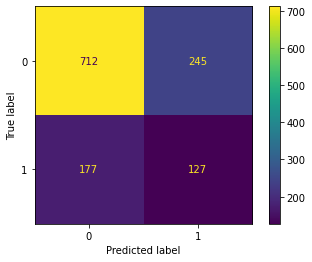

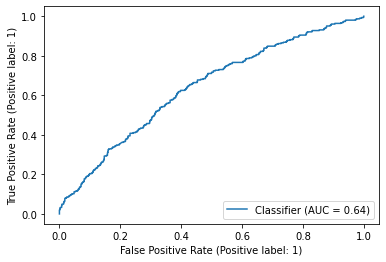

In [419]:
model = BTC_pro105()
model_name = 'models/' + str(model).split('(')[0] + '_tvt_' + str(20) + '.pt'
state_dict = torch.load(model_name)
model.load_state_dict(state_dict)


y_pred_list_rounded = []
y_pred_list = []
targets = []


model.eval()
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        targets.append(y_batch)

        y_test_pred = model(X_batch)
        y_test_pred = torch.sigmoid(y_test_pred)
        y_pred_tag = torch.round(y_test_pred)
        y_pred_list_rounded.append(y_pred_tag.cpu().numpy())
        y_pred_list.append(y_test_pred.cpu().numpy())

y_pred_list_rounded = [a.squeeze().tolist() for a in y_pred_list_rounded]
y_pred_list = [a.squeeze().tolist() for a in y_pred_list]
targets = [a.squeeze().tolist() for a in targets]


y_pred_list_rounded = [j for sub in y_pred_list_rounded for j in sub]
y_pred_list = [j for sub in y_pred_list for j in sub]
targets = [j for sub in targets for j in sub]

cm = confusion_matrix(targets, y_pred_list_rounded)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])
disp.plot()
TP, FP, TN, FN = cm[1,1], cm[0,1], cm[0,0], cm[1,0]
P = TP/(TP+FP)
R = TP/(TP+FN)
F1 = 2*P*R/(P+R)
print(f'recall : {R}')
print(f'precision : {P}')
print(f'F1 : {F1}')
print(f'acc : {(TP + TN)/(TP + TN + FP + FN)}')
RocCurveDisplay.from_predictions(targets, y_pred_list)

#### model pro106

In [420]:
# add one more layer to model pro100 
class BTC_pro106(nn.Module):
    def __init__(self):
        super(BTC_pro106, self).__init__()
        # Number of input features is 12.
        self.layer_1 = nn.Linear(37, 128) 
        self.layer_2 = nn.Linear(128, 128)
        self.layer_3 = nn.Linear(128, 64)
        self.layer_4 = nn.Linear(64, 32)
        self.layer_5 = nn.Linear(32, 16)
        self.layer_out = nn.Linear(16, 1) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.1)
        self.batchnorm1 = nn.BatchNorm1d(128)
        self.batchnorm2 = nn.BatchNorm1d(128)
        self.batchnorm3 = nn.BatchNorm1d(64)
        self.batchnorm4 = nn.BatchNorm1d(32)
        self.batchnorm5 = nn.BatchNorm1d(16)
        
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.batchnorm1(x)
        
        x = self.relu(self.layer_2(x))
        x = self.batchnorm2(x)
        
        x = self.relu(self.layer_3(x))
        x = self.batchnorm3(x)
        
        x = self.relu(self.layer_4(x))
        x = self.batchnorm4(x)
        
        x = self.relu(self.layer_5(x))
        x = self.batchnorm5(x)
        
        x = self.dropout(x)
        x = self.layer_out(x)
        
        return x

In [421]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [422]:
model = BTC_pro106()
model.to(device)

epochs = 50

cost = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
writer = SummaryWriter(log_dir = 'runs/' + str(model).split('(')[0])

for t in range(epochs):
    train(train_loader, model, cost, optimizer, t)
    test(valid_loader, model, t)
    torch.save(model.state_dict(), 'models/' + str(model).split('(')[0] + '_tvt_' + str(t) + '.pt')

writer.close()
torch.cuda.empty_cache()

C:\Users\bakhi\anaconda3\lib\site-packages\torchmetrics\utilities\prints.py:36: UserWarning: Metric `AUROC` will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)


In [424]:
device = torch.device("cpu")
print(device)

cpu


recall : 0.2894736842105263
precision : 0.3384615384615385
F1 : 0.3120567375886525
acc : 0.6923076923076923


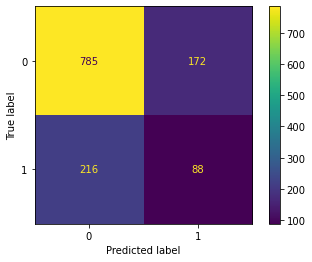

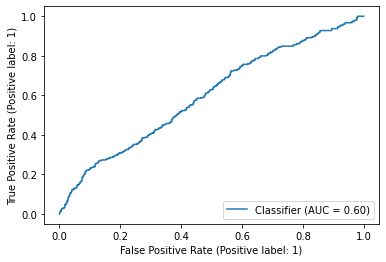

In [439]:
model = BTC_pro106()
model_name = 'models/' + str(model).split('(')[0] + '_tvt_' + str(40) + '.pt'
state_dict = torch.load(model_name)
model.load_state_dict(state_dict)


y_pred_list_rounded = []
y_pred_list = []
targets = []


model.eval()
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        targets.append(y_batch)

        y_test_pred = model(X_batch)
        y_test_pred = torch.sigmoid(y_test_pred)
        y_pred_tag = torch.round(y_test_pred)
        y_pred_list_rounded.append(y_pred_tag.cpu().numpy())
        y_pred_list.append(y_test_pred.cpu().numpy())

y_pred_list_rounded = [a.squeeze().tolist() for a in y_pred_list_rounded]
y_pred_list = [a.squeeze().tolist() for a in y_pred_list]
targets = [a.squeeze().tolist() for a in targets]


y_pred_list_rounded = [j for sub in y_pred_list_rounded for j in sub]
y_pred_list = [j for sub in y_pred_list for j in sub]
targets = [j for sub in targets for j in sub]

cm = confusion_matrix(targets, y_pred_list_rounded)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])
disp.plot()
TP, FP, TN, FN = cm[1,1], cm[0,1], cm[0,0], cm[1,0]
P = TP/(TP+FP)
R = TP/(TP+FN)
F1 = 2*P*R/(P+R)
print(f'recall : {R}')
print(f'precision : {P}')
print(f'F1 : {F1}')
print(f'acc : {(TP + TN)/(TP + TN + FP + FN)}')
RocCurveDisplay.from_predictions(targets, y_pred_list)

#### model pro107

In [431]:
# add one more layer to model pro100 
class BTC_pro107(nn.Module):
    def __init__(self):
        super(BTC_pro107, self).__init__()
        # Number of input features is 12.
        self.layer_1 = nn.Linear(37, 64) 
        self.layer_2 = nn.Linear(64, 32)
        self.layer_3 = nn.Linear(32, 16)
        self.layer_4 = nn.Linear(16, 8)
        self.layer_out = nn.Linear(8, 1) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.1)
        self.batchnorm1 = nn.BatchNorm1d(64)
        self.batchnorm2 = nn.BatchNorm1d(32)
        self.batchnorm3 = nn.BatchNorm1d(16)
        self.batchnorm4 = nn.BatchNorm1d(8)
        
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.batchnorm1(x)
        
        x = self.relu(self.layer_2(x))
        x = self.batchnorm2(x)
        
        x = self.relu(self.layer_3(x))
        x = self.batchnorm3(x)
        
        x = self.relu(self.layer_4(x))
        x = self.batchnorm4(x)

        
        x = self.dropout(x)
        x = self.layer_out(x)
        
        return x

In [429]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [432]:
model = BTC_pro107()
model.to(device)

epochs = 50

cost = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
writer = SummaryWriter(log_dir = 'runs/' + str(model).split('(')[0])

for t in range(epochs):
    train(train_loader, model, cost, optimizer, t)
    test(valid_loader, model, t)
    torch.save(model.state_dict(), 'models/' + str(model).split('(')[0] + '_tvt_' + str(t) + '.pt')

writer.close()
torch.cuda.empty_cache()

C:\Users\bakhi\anaconda3\lib\site-packages\torchmetrics\utilities\prints.py:36: UserWarning: Metric `AUROC` will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)


In [433]:
device = torch.device("cpu")
print(device)

cpu


recall : 0.4901315789473684
precision : 0.34651162790697676
F1 : 0.40599455040871935
acc : 0.6542426645519429


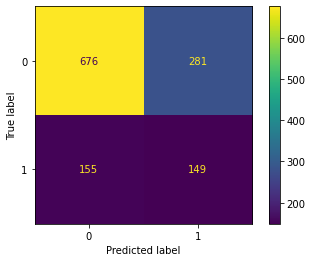

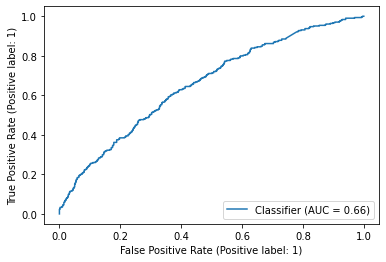

In [437]:
model = BTC_pro107()
model_name = 'models/' + str(model).split('(')[0] + '_tvt_' + str(40) + '.pt'
state_dict = torch.load(model_name)
model.load_state_dict(state_dict)


y_pred_list_rounded = []
y_pred_list = []
targets = []


model.eval()
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        targets.append(y_batch)

        y_test_pred = model(X_batch)
        y_test_pred = torch.sigmoid(y_test_pred)
        y_pred_tag = torch.round(y_test_pred)
        y_pred_list_rounded.append(y_pred_tag.cpu().numpy())
        y_pred_list.append(y_test_pred.cpu().numpy())

y_pred_list_rounded = [a.squeeze().tolist() for a in y_pred_list_rounded]
y_pred_list = [a.squeeze().tolist() for a in y_pred_list]
targets = [a.squeeze().tolist() for a in targets]


y_pred_list_rounded = [j for sub in y_pred_list_rounded for j in sub]
y_pred_list = [j for sub in y_pred_list for j in sub]
targets = [j for sub in targets for j in sub]

cm = confusion_matrix(targets, y_pred_list_rounded)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])
disp.plot()
TP, FP, TN, FN = cm[1,1], cm[0,1], cm[0,0], cm[1,0]
P = TP/(TP+FP)
R = TP/(TP+FN)
F1 = 2*P*R/(P+R)
print(f'recall : {R}')
print(f'precision : {P}')
print(f'F1 : {F1}')
print(f'acc : {(TP + TN)/(TP + TN + FP + FN)}')
RocCurveDisplay.from_predictions(targets, y_pred_list)

# OPTUNA for model pro107

In [472]:
# add one more layer to model pro100 
class BTC_pro107_tune(nn.Module):
    def __init__(self, trial):
        super(BTC_pro107_tune, self).__init__()
        
        linear_size1 = trial.suggest_int("linear_size1", 32, 64, step=4)
        linear_size2 = trial.suggest_int("linear_size2", 24, 48, step=2)
        linear_size3 = trial.suggest_int("linear_size3", 10, 32, step=2)
        linear_size4 = trial.suggest_int("linear_size4", 2, 8, step=2)
        

        self.layer_1 = nn.Linear(37, linear_size1) 
        self.layer_2 = nn.Linear(linear_size1, linear_size2)
        self.layer_3 = nn.Linear(linear_size2, linear_size3)
        self.layer_4 = nn.Linear(linear_size3, linear_size4)
        self.layer_out = nn.Linear(linear_size4, 1) 
        
        self.relu = nn.ReLU()
        
        dropout_rate = trial.suggest_float("dropout_rate", 0.1, 0.5,step=0.1)
        
        self.dropout = nn.Dropout(p=dropout_rate)
        self.batchnorm1 = nn.BatchNorm1d(linear_size1)
        self.batchnorm2 = nn.BatchNorm1d(linear_size2)
        self.batchnorm3 = nn.BatchNorm1d(linear_size3)
        self.batchnorm4 = nn.BatchNorm1d(linear_size4)
        
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.batchnorm1(x)
        
        x = self.relu(self.layer_2(x))
        x = self.batchnorm2(x)
        
        x = self.relu(self.layer_3(x))
        x = self.batchnorm3(x)
        
        x = self.relu(self.layer_4(x))
        x = self.batchnorm4(x)

        
        x = self.dropout(x)
        x = self.layer_out(x)
        
        return x

In [473]:
def objective(trial):
    
    best_total_auc = 0
    model = BTC_pro107_tune(trial).to(device)
    optimizer_name = "Adam"
    lr = 1e-4
    optimizer = getattr(optim, optimizer_name)(model.parameters(), lr=lr)

    train_loader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
    valid_loader = DataLoader(dataset=valid_data, batch_size=BATCH_SIZE, shuffle=True)

    #criterion=nn.CrossEntropyLoss()
    criterion=nn.BCEWithLogitsLoss()
    # Training of the model.
    for epoch in range(40):
        model.train()
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            y_pred = model(X_batch)
            #y_batch = y_batch.type(torch.int)
            loss = criterion(y_pred, y_batch.unsqueeze(1))
            loss.backward()
            optimizer.step()

        # Validation of the model.
        model.eval()
        correct = 0
        AUC = AUROC()
        
        with torch.no_grad():
            for X_batch, y_batch in valid_loader:
                X_batch, y_batch = X_batch.to(device), y_batch.to(device)

                y_test_pred = model(X_batch)
                y_test_pred = torch.sigmoid(y_test_pred)
                y_batch = y_batch.type(torch.int)
                prediction = y_test_pred.T[0]
                AUC(prediction, y_batch)

        total_auc = AUC.compute()
        
        if best_total_auc < total_auc:
            best_total_auc = total_auc
        
        trial.report(best_total_auc, epoch)
        AUC.reset()

        # Handle pruning based on the intermediate value.
        if trial.should_prune():
            raise optuna.exceptions.TrialPruned()
            
    return best_total_auc

In [469]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

trial = study.best_trial

print('Auc: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

[I 2022-07-29 17:50:02,739] A new study created in memory with name: no-name-d4b51e24-a764-47fe-841d-272abed021f9
C:\Users\bakhi\anaconda3\lib\site-packages\torchmetrics\utilities\prints.py:36: UserWarning: Metric `AUROC` will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)
[I 2022-07-29 17:50:14,822] Trial 0 finished with value: 0.6318953037261963 and parameters: {'linear_size1': 64, 'linear_size2': 16, 'linear_size3': 8, 'linear_size4': 4, 'dropout_rate': 0.4}. Best is trial 0 with value: 0.6318953037261963.
C:\Users\bakhi\anaconda3\lib\site-packages\torchmetrics\utilities\prints.py:36: UserWarning: Metric `AUROC` will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)
[I 2022-07-29 17:50:27,239] Trial 1 finished with value: 0.636768102645874 and parameters: {'linear_size1': 44, 'linear_size2': 32, 'linear_size3

Auc: 0.6788530945777893
Best hyperparameters: {'linear_size1': 48, 'linear_size2': 32, 'linear_size3': 16, 'linear_size4': 4, 'dropout_rate': 0.4}


In [474]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=300)

trial = study.best_trial

print('Auc: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

[I 2022-07-29 18:01:37,738] A new study created in memory with name: no-name-c77b9995-2e41-4bf8-8026-93c4eddbf6c0
C:\Users\bakhi\anaconda3\lib\site-packages\torchmetrics\utilities\prints.py:36: UserWarning: Metric `AUROC` will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)
[I 2022-07-29 18:01:50,600] Trial 0 finished with value: 0.6251775622367859 and parameters: {'linear_size1': 56, 'linear_size2': 44, 'linear_size3': 30, 'linear_size4': 2, 'dropout_rate': 0.30000000000000004}. Best is trial 0 with value: 0.6251775622367859.
C:\Users\bakhi\anaconda3\lib\site-packages\torchmetrics\utilities\prints.py:36: UserWarning: Metric `AUROC` will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)
[I 2022-07-29 18:02:03,176] Trial 1 finished with value: 0.666800856590271 and parameters: {'linear_size1': 44, 'linear_size2': 

Auc: 0.6819875836372375
Best hyperparameters: {'linear_size1': 44, 'linear_size2': 24, 'linear_size3': 22, 'linear_size4': 4, 'dropout_rate': 0.1}


In [ ]:
Best hyperparameters: {'linear_size1': 44, 'linear_size2': 24, 'linear_size3': 22, 'linear_size4': 4, 'dropout_rate': 0.1}

#### model pro108

In [476]:
# add one more layer to model pro100 
class BTC_pro108(nn.Module):
    def __init__(self):
        super(BTC_pro108, self).__init__()
        # Number of input features is 12.
        self.layer_1 = nn.Linear(37, 44) 
        self.layer_2 = nn.Linear(44, 24)
        self.layer_3 = nn.Linear(24, 22)
        self.layer_4 = nn.Linear(22, 4)
        self.layer_out = nn.Linear(4, 1) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.1)
        self.batchnorm1 = nn.BatchNorm1d(44)
        self.batchnorm2 = nn.BatchNorm1d(24)
        self.batchnorm3 = nn.BatchNorm1d(22)
        self.batchnorm4 = nn.BatchNorm1d(4)
        
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.batchnorm1(x)
        
        x = self.relu(self.layer_2(x))
        x = self.batchnorm2(x)
        
        x = self.relu(self.layer_3(x))
        x = self.batchnorm3(x)
        
        x = self.relu(self.layer_4(x))
        x = self.batchnorm4(x)

        
        x = self.dropout(x)
        x = self.layer_out(x)
        
        return x

In [477]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [478]:
model = BTC_pro108()
model.to(device)

epochs = 50

cost = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
writer = SummaryWriter(log_dir = 'runs/' + str(model).split('(')[0])

for t in range(epochs):
    train(train_loader, model, cost, optimizer, t)
    test(valid_loader, model, t)
    torch.save(model.state_dict(), 'models/' + str(model).split('(')[0] + '_tvt_' + str(t) + '.pt')

writer.close()
torch.cuda.empty_cache()

In [480]:
device = torch.device("cpu")
print(device)

cpu


recall : 0.42105263157894735
precision : 0.31683168316831684
F1 : 0.36158192090395475
acc : 0.6415543219666932


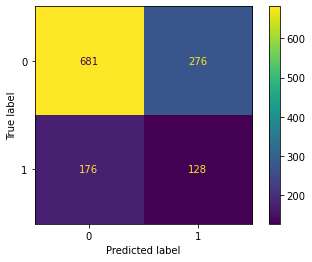

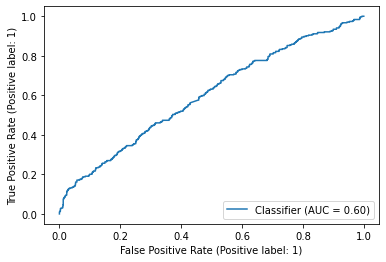

In [487]:
model = BTC_pro108()
model_name = 'models/' + str(model).split('(')[0] + '_tvt_' + str(20) + '.pt'
state_dict = torch.load(model_name)
model.load_state_dict(state_dict)


y_pred_list_rounded = []
y_pred_list = []
targets = []


model.eval()
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        targets.append(y_batch)

        y_test_pred = model(X_batch)
        y_test_pred = torch.sigmoid(y_test_pred)
        y_pred_tag = torch.round(y_test_pred)
        y_pred_list_rounded.append(y_pred_tag.cpu().numpy())
        y_pred_list.append(y_test_pred.cpu().numpy())

y_pred_list_rounded = [a.squeeze().tolist() for a in y_pred_list_rounded]
y_pred_list = [a.squeeze().tolist() for a in y_pred_list]
targets = [a.squeeze().tolist() for a in targets]


y_pred_list_rounded = [j for sub in y_pred_list_rounded for j in sub]
y_pred_list = [j for sub in y_pred_list for j in sub]
targets = [j for sub in targets for j in sub]

cm = confusion_matrix(targets, y_pred_list_rounded)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])
disp.plot()
TP, FP, TN, FN = cm[1,1], cm[0,1], cm[0,0], cm[1,0]
P = TP/(TP+FP)
R = TP/(TP+FN)
F1 = 2*P*R/(P+R)
print(f'recall : {R}')
print(f'precision : {P}')
print(f'F1 : {F1}')
print(f'acc : {(TP + TN)/(TP + TN + FP + FN)}')
RocCurveDisplay.from_predictions(targets, y_pred_list)

# WILL TRY USE IT FOR TRAIDING STRATEGY